In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
df_train = pd.read_csv('mnist_train.csv')
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test = pd.read_csv('mnist_test.csv')
df_test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train = df_train[df_train.columns[1:]]
X_test = df_test[df_test.columns[1:]]
X_train.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, 1x1 to 28x28
dtypes: int64(784)
memory usage: 358.9 MB


In [7]:
y_train = df_train[df_train.columns[0]]
y_test = df_test[df_test.columns[0]]
y_train.head()

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

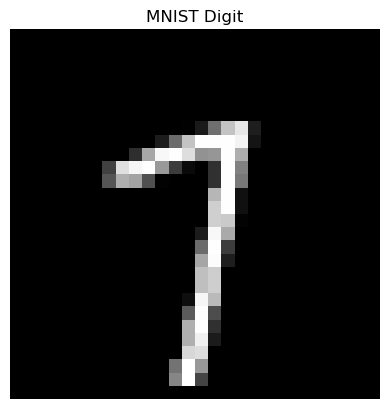

In [8]:
plt.imshow(X_train.iloc[42].to_numpy().reshape(28,28), cmap='gray')
plt.title("MNIST Digit")
plt.axis('off')  # Hide axes for clarity
plt.show()

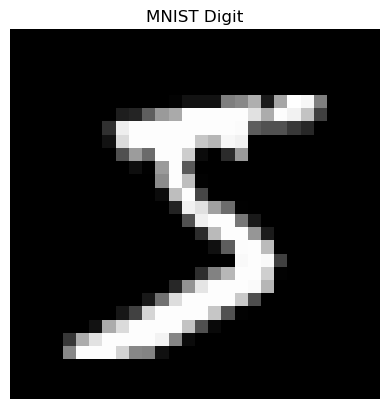

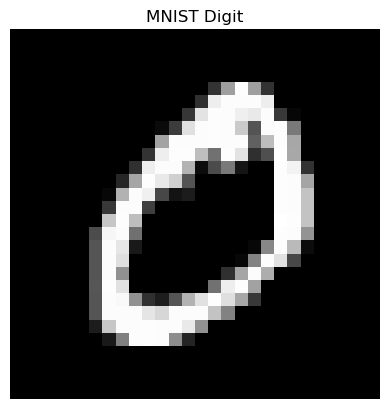

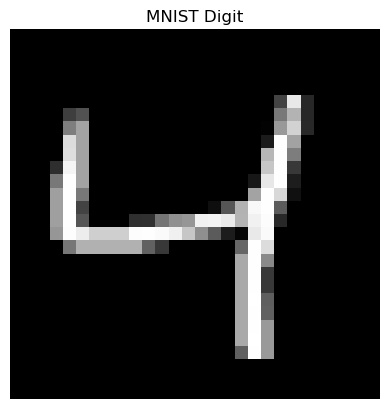

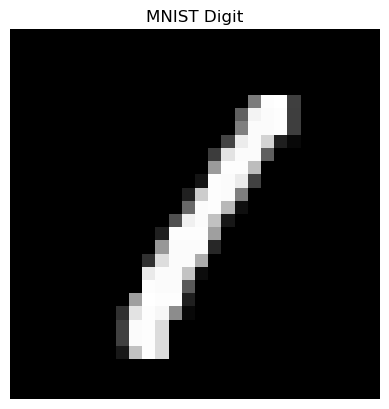

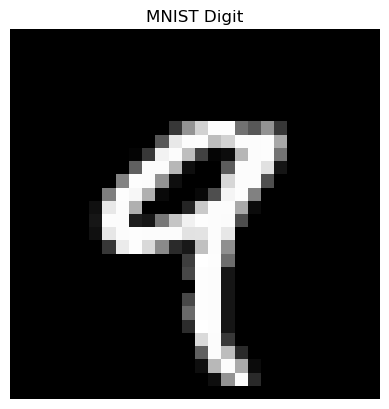

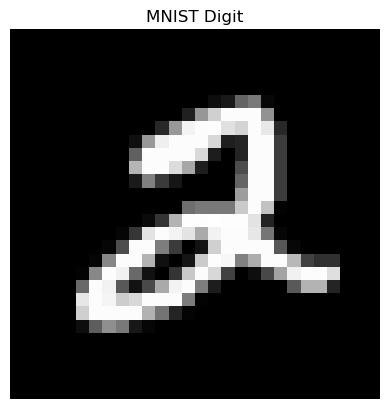

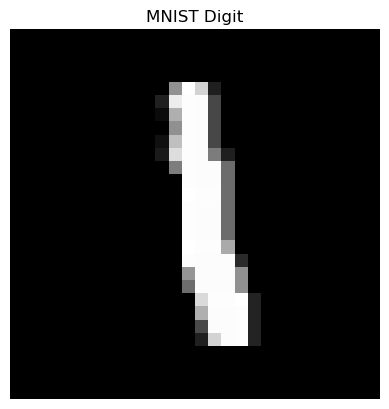

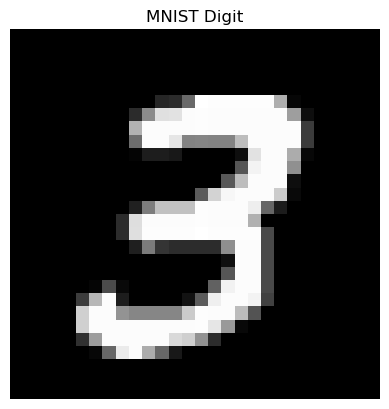

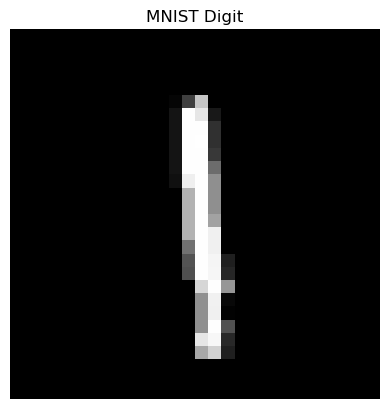

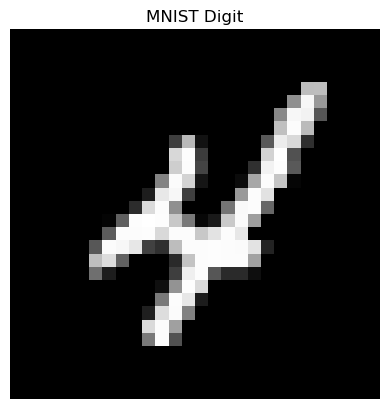

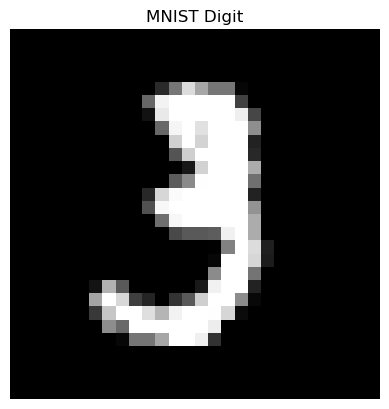

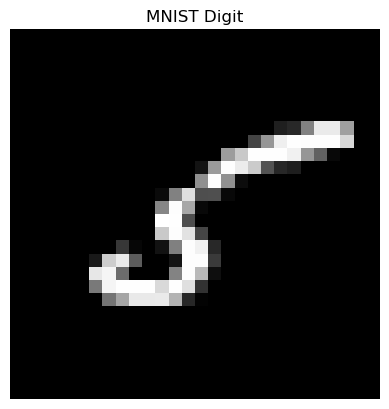

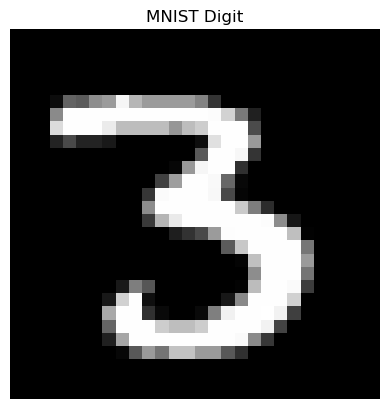

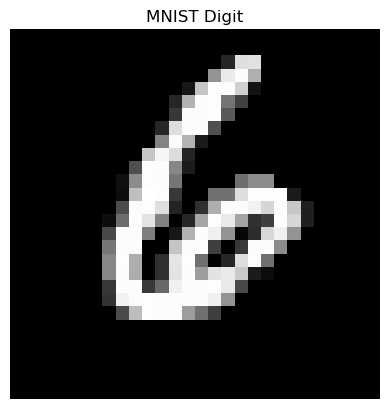

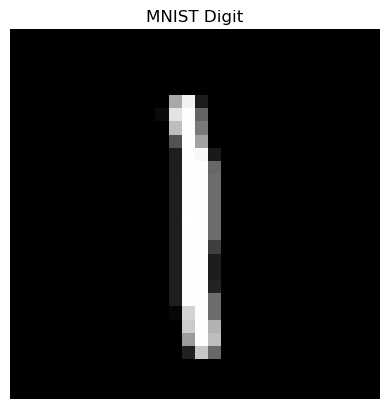

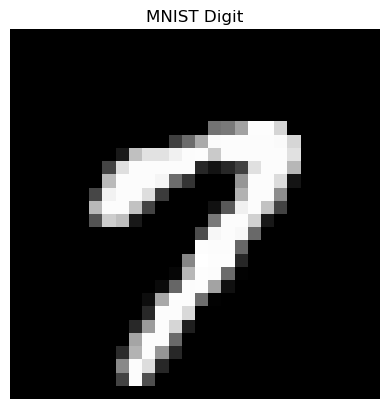

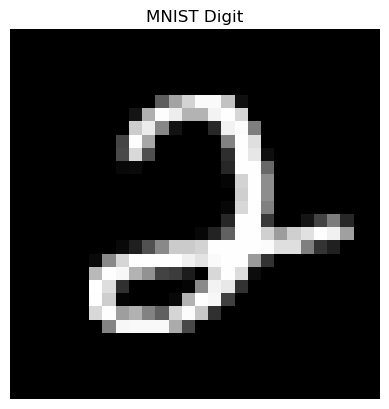

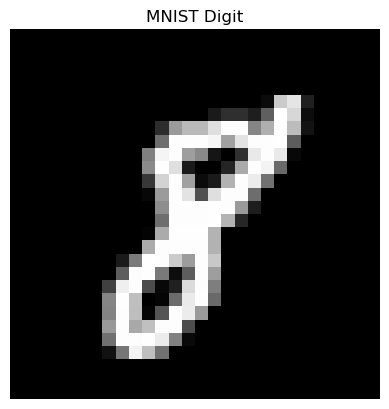

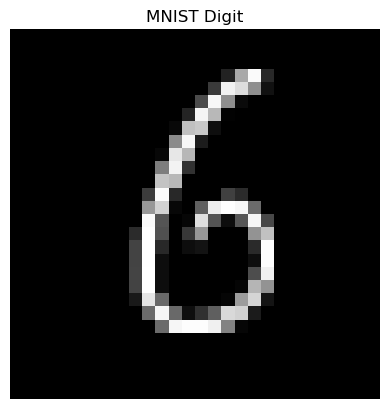

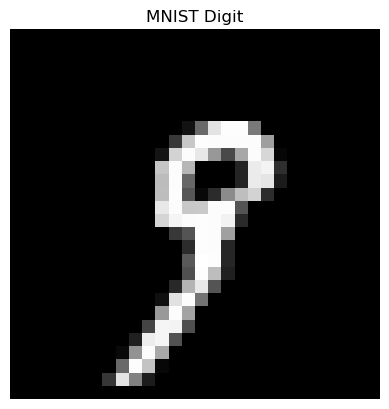

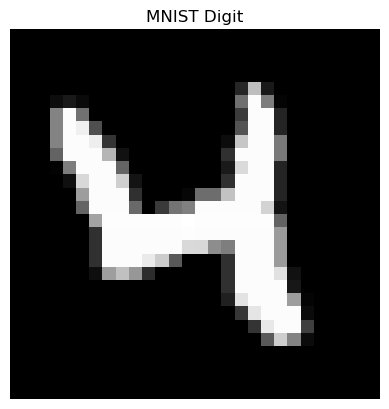

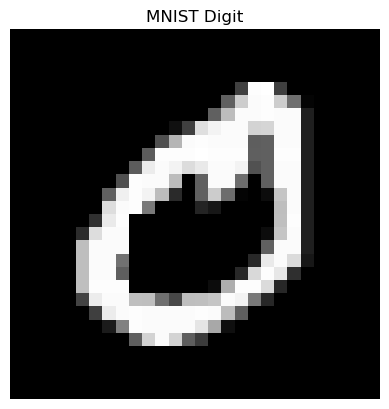

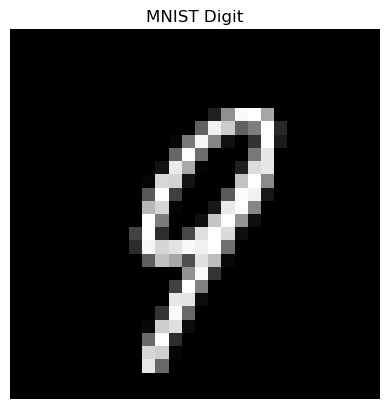

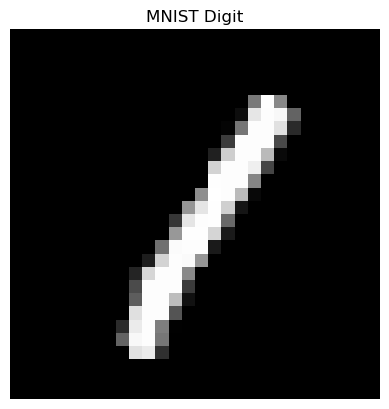

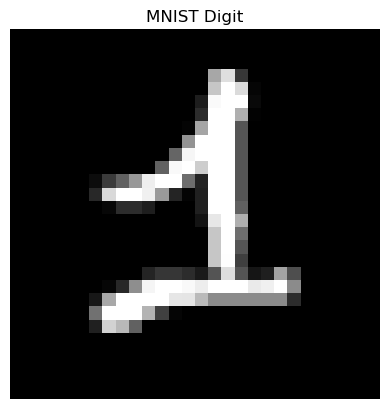

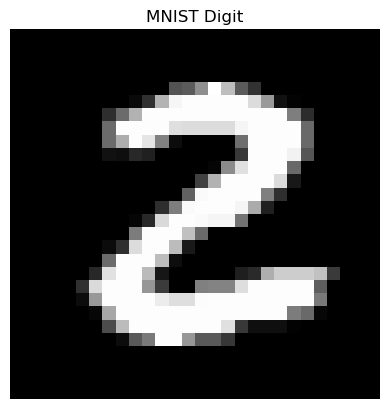

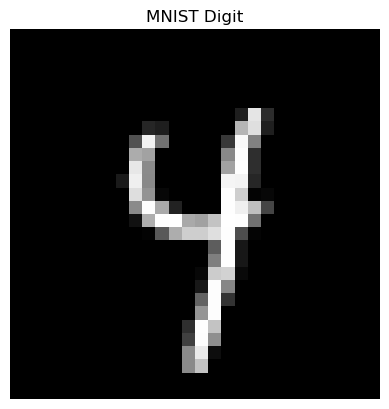

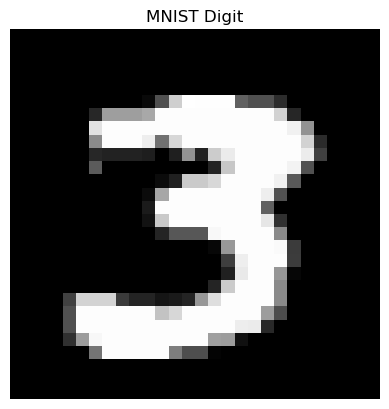

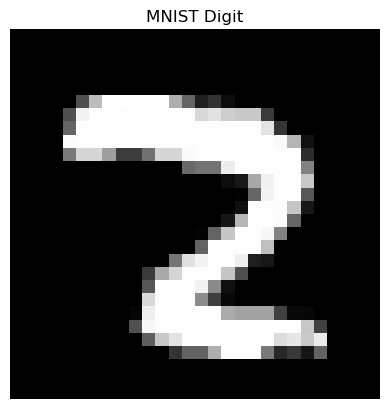

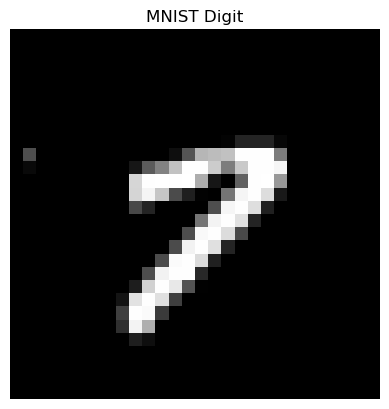

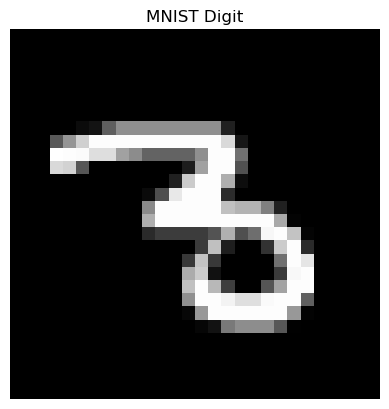

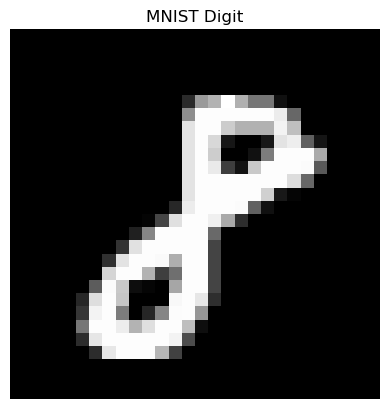

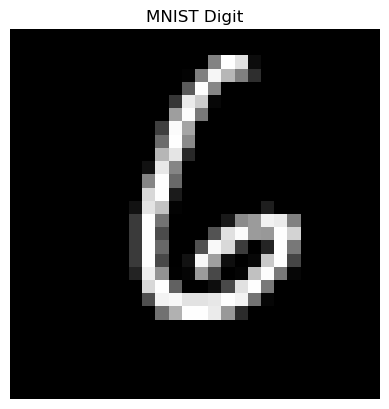

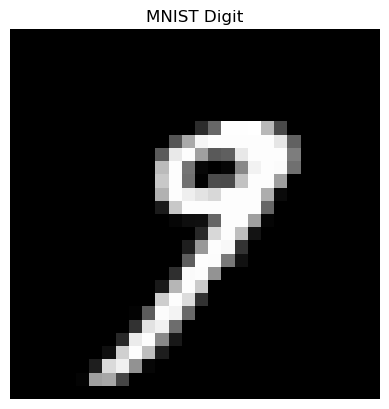

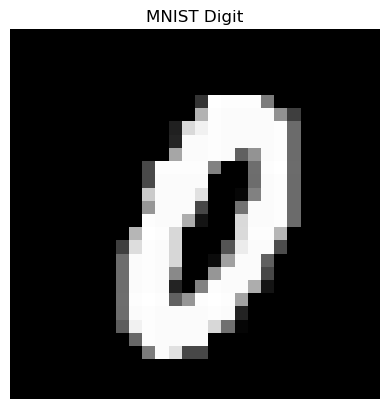

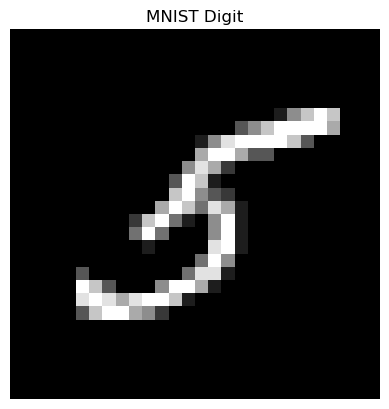

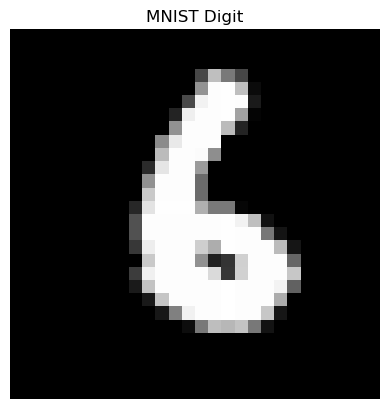

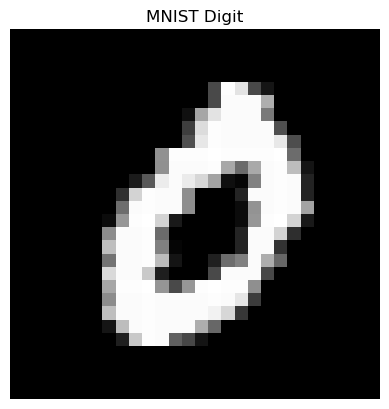

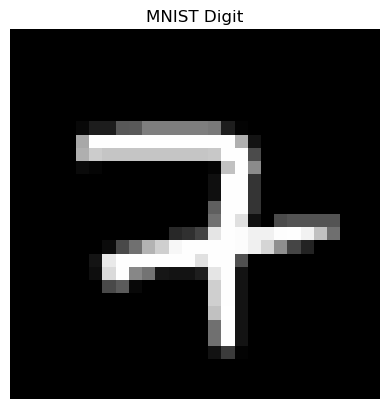

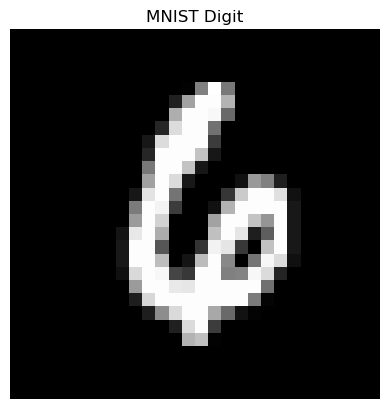

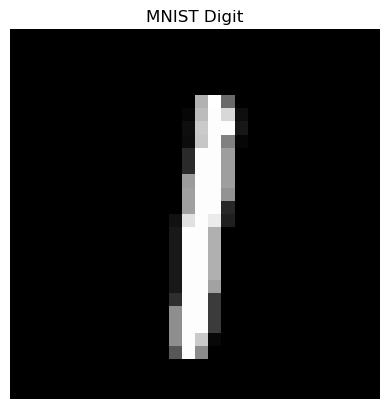

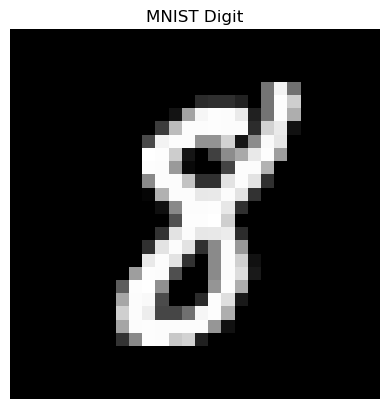

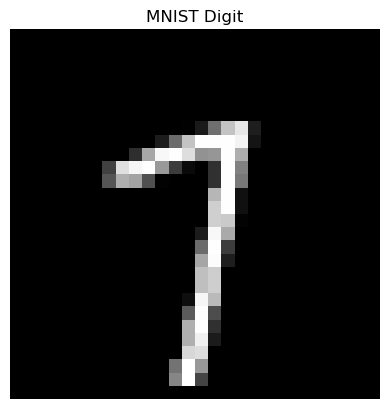

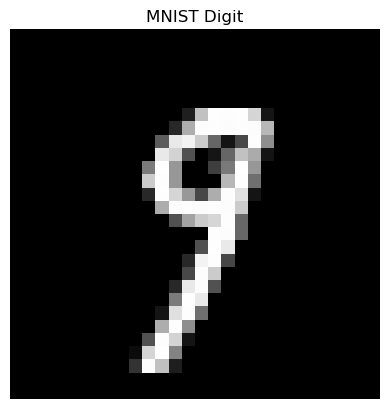

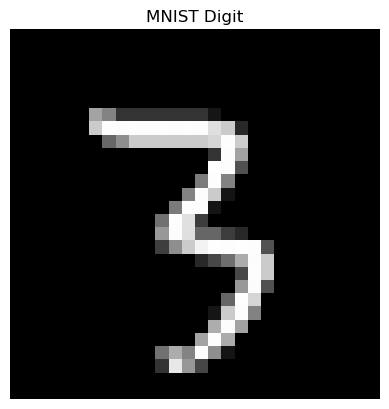

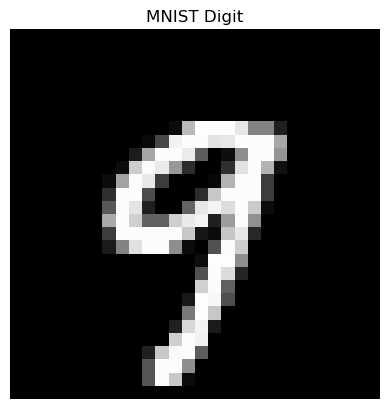

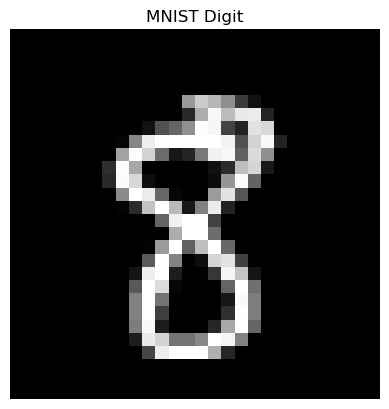

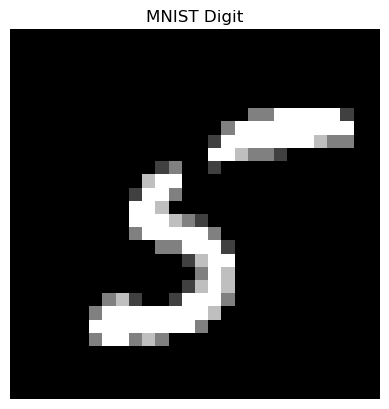

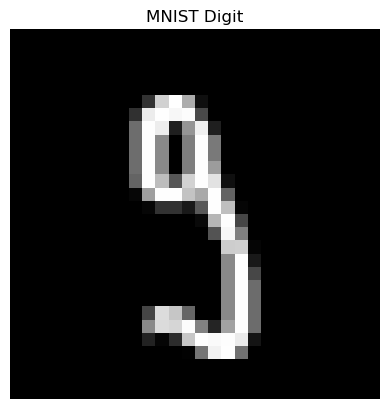

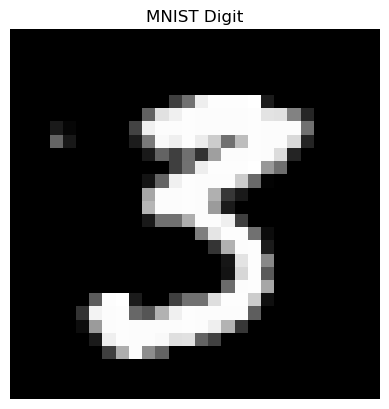

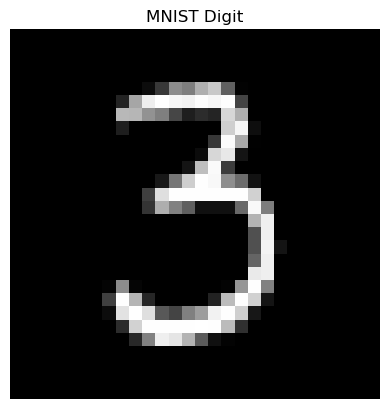

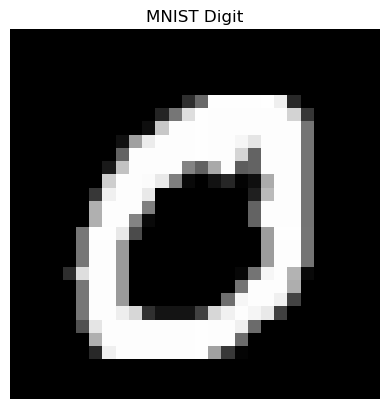

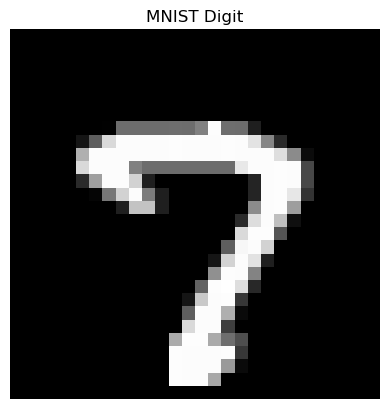

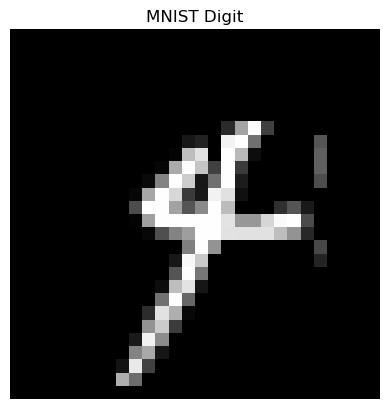

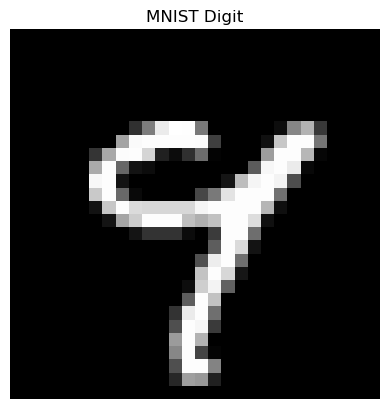

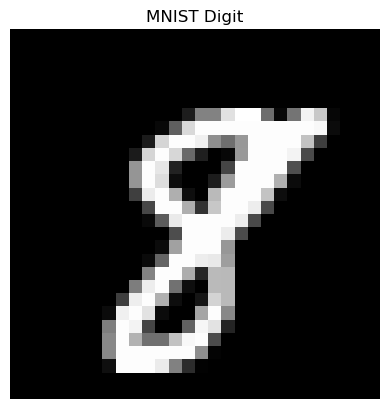

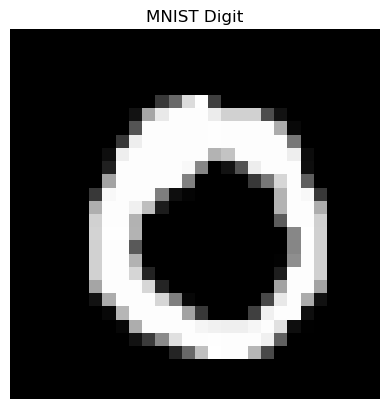

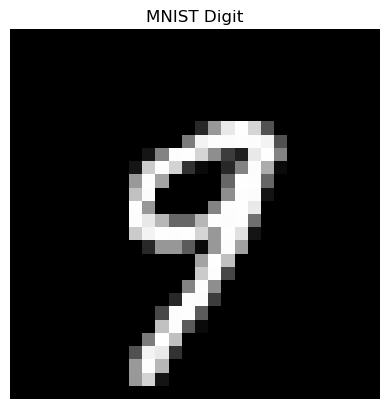

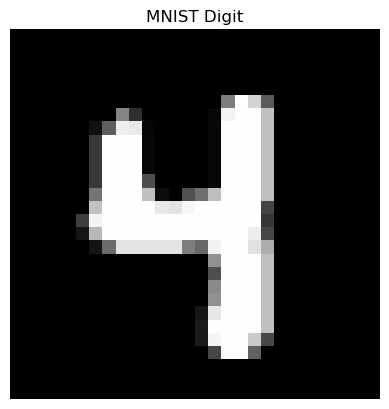

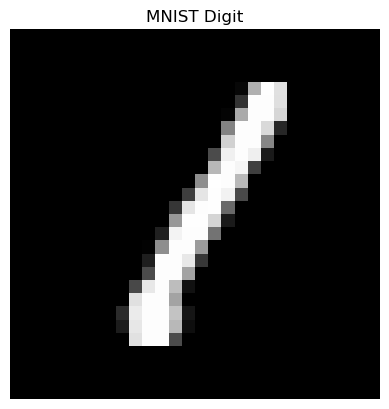

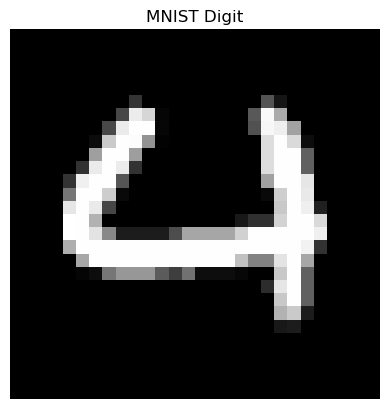

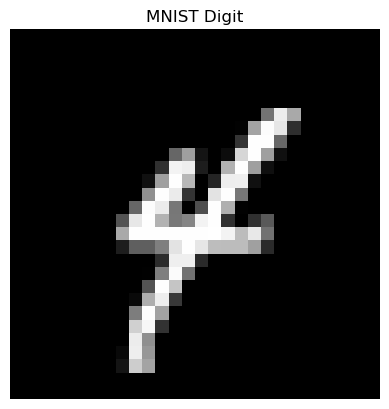

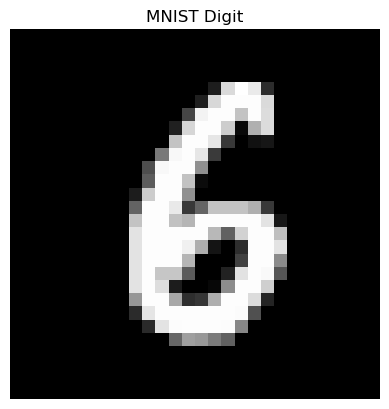

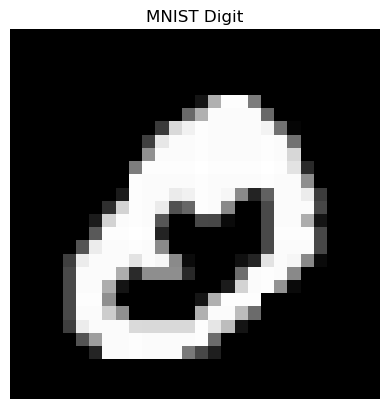

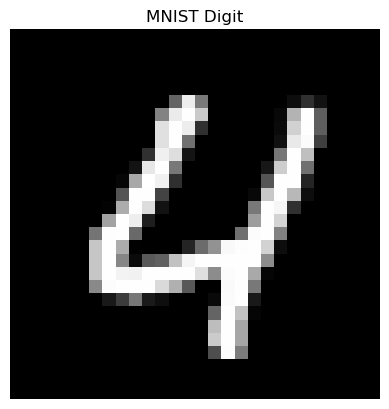

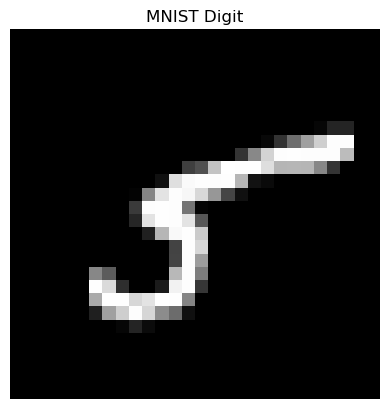

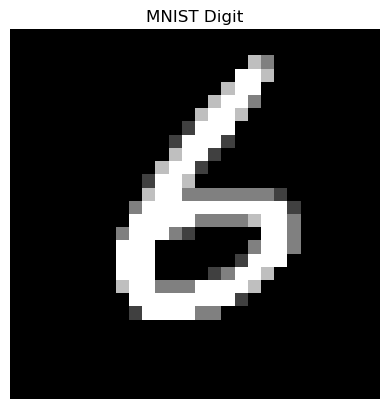

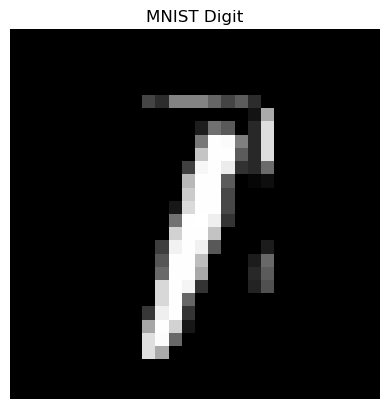

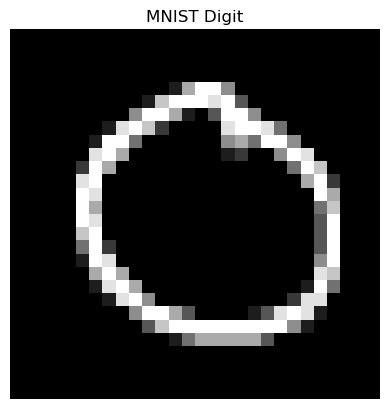

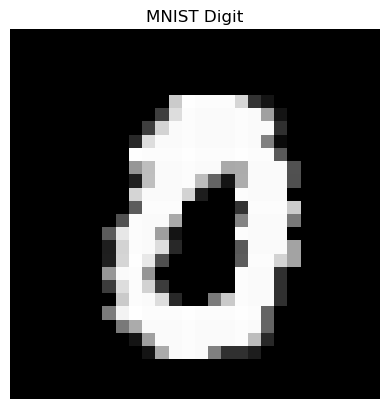

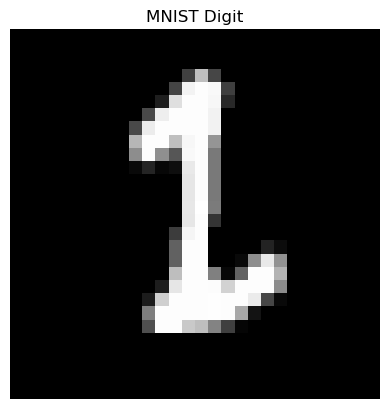

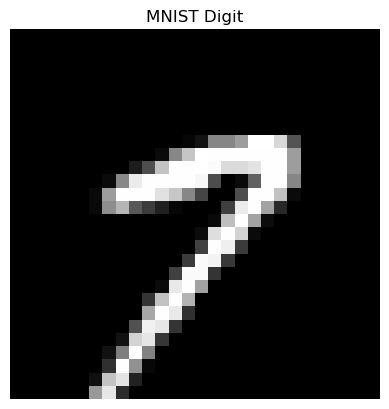

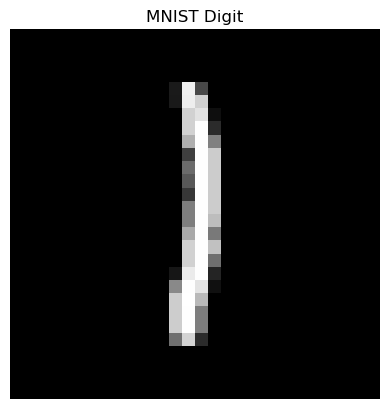

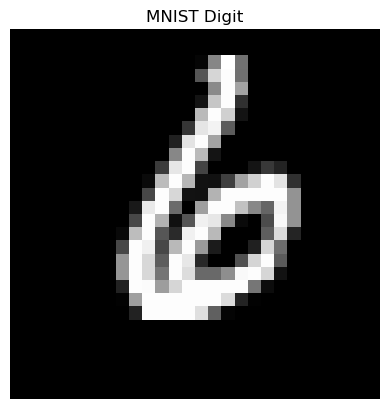

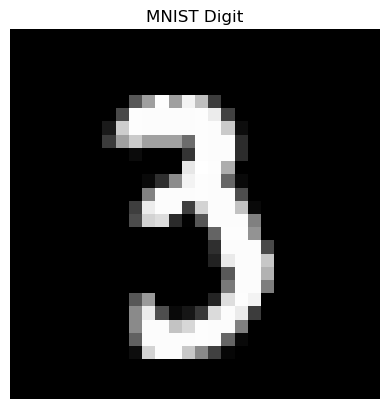

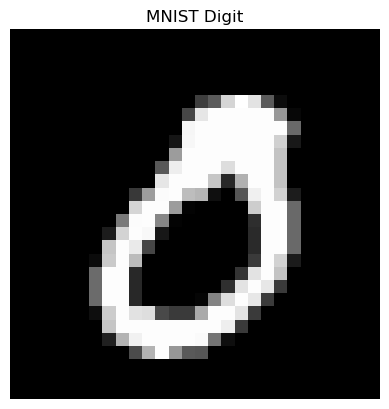

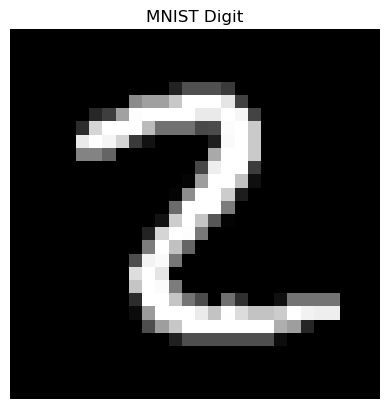

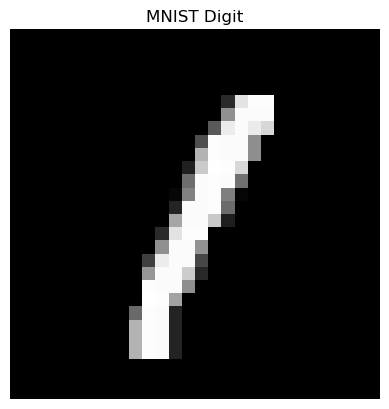

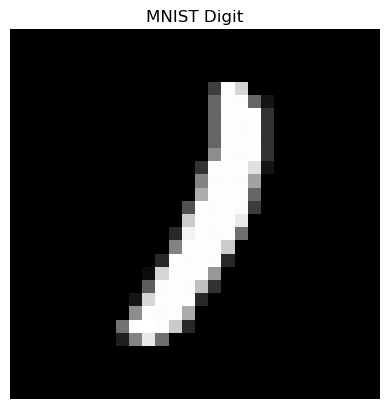

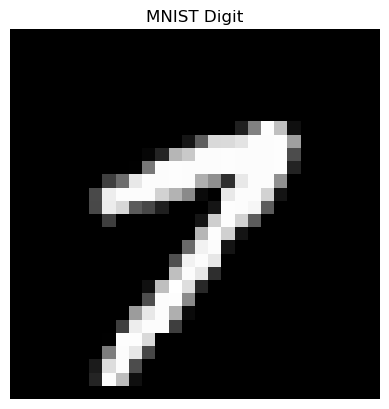

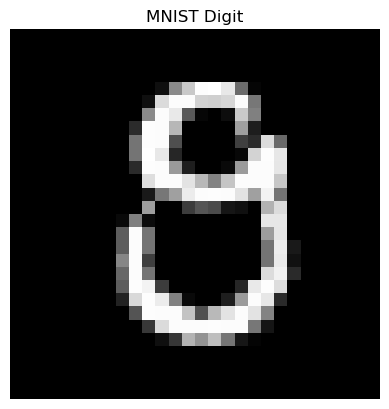

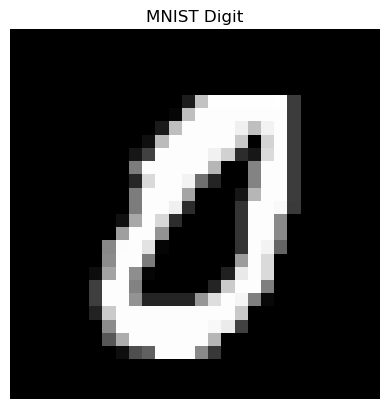

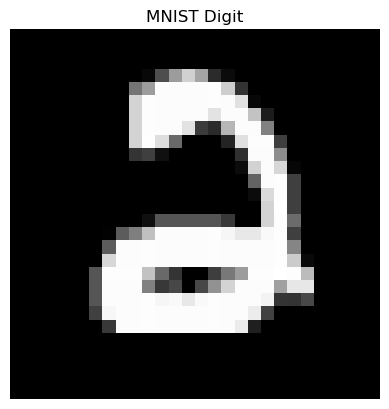

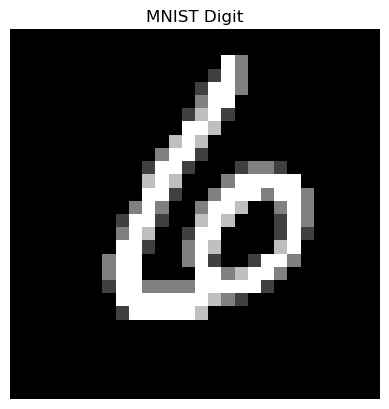

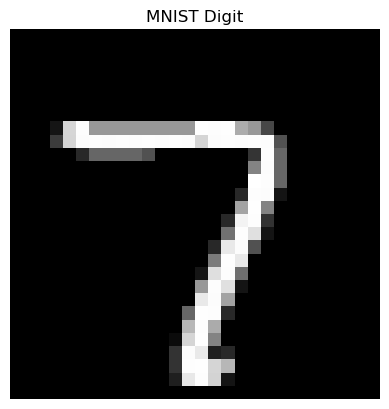

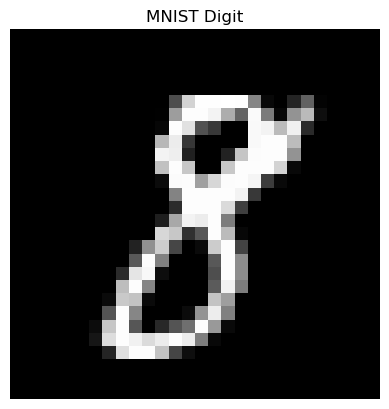

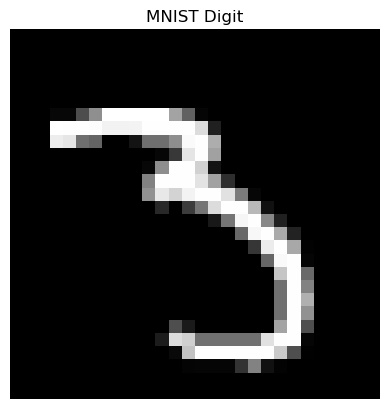

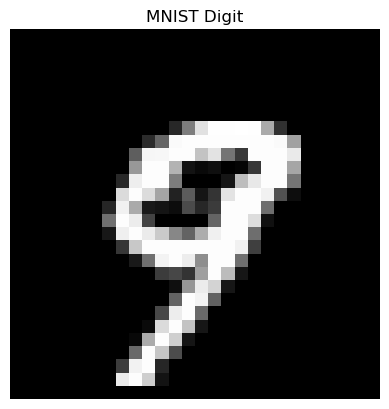

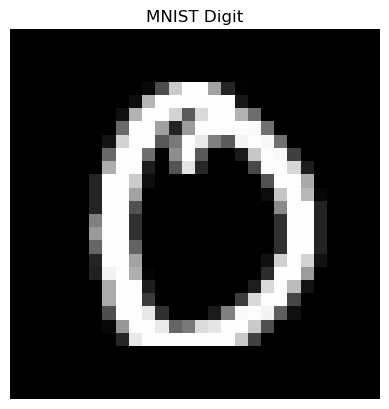

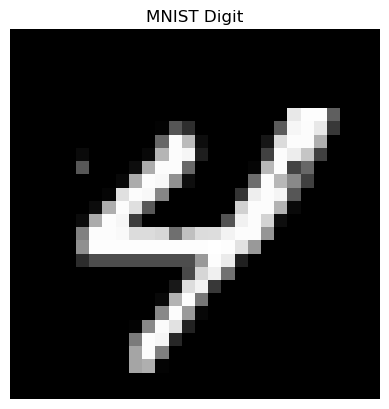

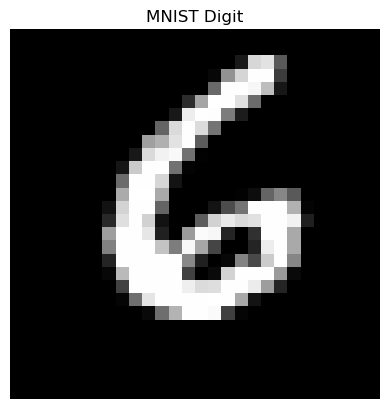

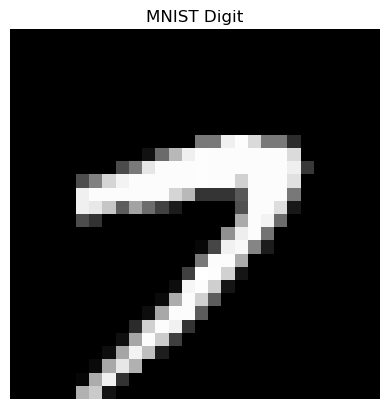

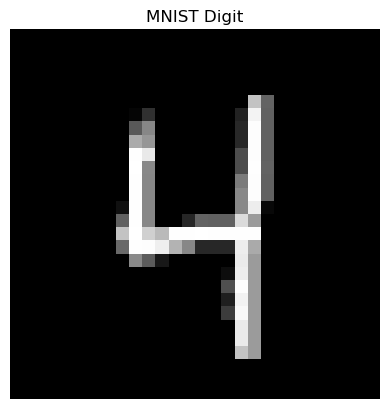

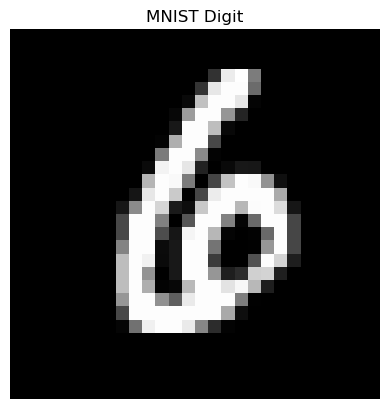

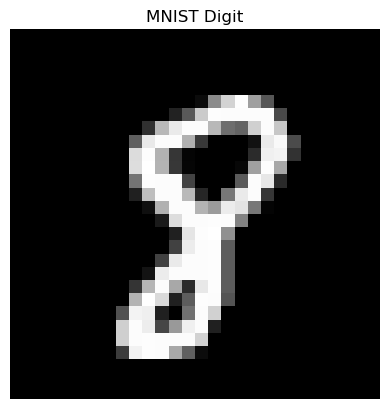

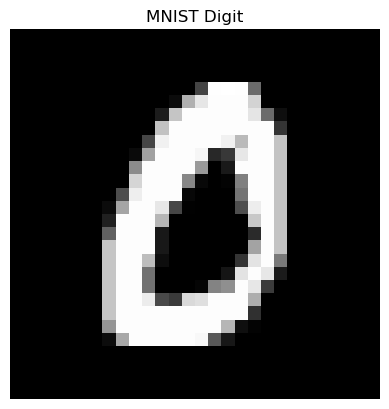

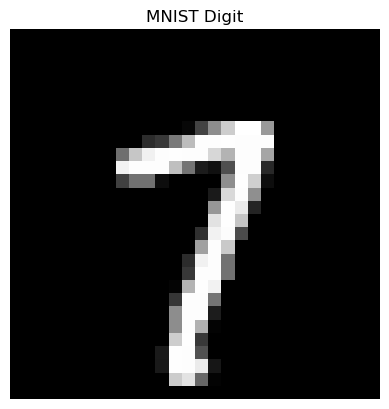

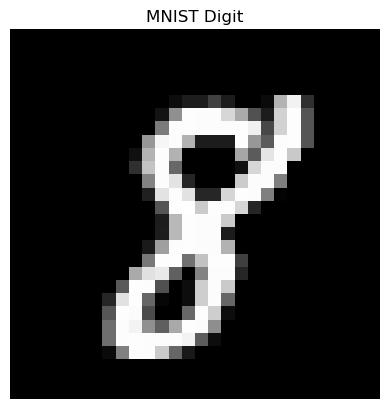

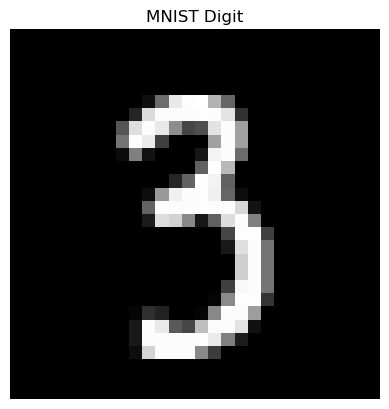

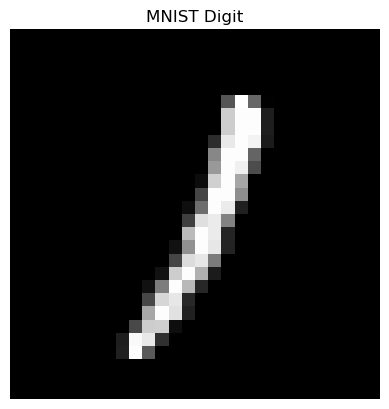

In [9]:
for i in range(100):
    plt.imshow(X_train.iloc[i].to_numpy().reshape(28,28), cmap='gray')
    plt.title("MNIST Digit")
    plt.axis('off')  # Hide axes for clarity
    plt.show()

In [10]:
X_train = X_train/255

In [11]:
X_train.max().max()

1.0

In [12]:
X_test = X_test/255

In [13]:
X_test.max().max()

1.0

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, 1x1 to 28x28
dtypes: float64(784)
memory usage: 358.9 MB


In [15]:
X_train_tensor = torch.tensor(X_train.to_numpy()).float().to(device)
X_test_tensor = torch.tensor(X_test.to_numpy()).float().to(device)

In [16]:
X_train_tensor

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

In [17]:
train_one_hot = pd.get_dummies(y_train).astype(int)
test_one_hot = pd.get_dummies(y_test).astype(int)

In [18]:
train_one_hot

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,1,0
59996,0,0,0,1,0,0,0,0,0,0
59997,0,0,0,0,0,1,0,0,0,0
59998,0,0,0,0,0,0,1,0,0,0


In [19]:
train_onehot_tensor = torch.tensor(train_one_hot.to_numpy()).to(device)
test_onehot_tensor = torch.tensor(test_one_hot.to_numpy()).to(device)

In [20]:
train_onehot_tensor

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 1, 0]], device='cuda:0')

In [21]:
test_onehot_tensor

tensor([[0, 0, 0,  ..., 1, 0, 0],
        [0, 0, 1,  ..., 0, 0, 0],
        [0, 1, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], device='cuda:0')

In [22]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=0)
        self.maxpool = nn.MaxPool2d(kernel_size = 2)
        self.flatten = nn.Flatten()
        self.dropout = nn.Dropout(0.2)
        
        self.conv1 = nn.Conv2d(1, 6, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=3, padding=1)
        self.fc = nn.Linear(16*7*7, 10)
    def forward(self, x):
        x = x.view(-1, 1, 28, 28)  # Reshape input to (batch_size, 1, 28, 28)
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.dropout(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.dropout(x)
        x = self.flatten(x)
        x = self.fc(x)
        x = x.squeeze()  #W CHUJ WAZNE, ZEBY TO BYLO ORYGINALNIE

        return x

In [23]:
example = X_train_tensor[1]

In [24]:
model = Model().to(device)

In [25]:
output = model(example)

In [26]:
output.shape

torch.Size([10])

In [27]:
output

tensor([ 0.1696,  0.1029, -0.1006,  0.0756, -0.0876, -0.1386, -0.2340, -0.0484,
         0.0749,  0.1886], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [28]:
training_dataset = TensorDataset(X_train_tensor, train_onehot_tensor.float())
training_dataloader = DataLoader(training_dataset, batch_size=128, shuffle=True)

In [29]:
test_dataset = TensorDataset(X_test_tensor, test_onehot_tensor.float())
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [30]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [31]:
model.train()
num_epochs = 50
for epoch in range(num_epochs):
    train_loss = 0.0
    for features, labels in training_dataloader:
        #device
        #features, labels = features.to(device), labels.to(device)
        #forward
        outputs = model(features)
        #backward
        optimizer.zero_grad()
        loss = criterion(outputs, labels)
        loss.backward()
        #optimizer
        optimizer.step()
        train_loss += loss.item()
    print(f"epoch [{epoch+1}/{num_epochs}]: loss: {train_loss/len(training_dataloader):.6f}")

epoch [1/50]: loss: 0.520579
epoch [2/50]: loss: 0.214292
epoch [3/50]: loss: 0.159668
epoch [4/50]: loss: 0.135393
epoch [5/50]: loss: 0.118028
epoch [6/50]: loss: 0.107505
epoch [7/50]: loss: 0.099167
epoch [8/50]: loss: 0.093959
epoch [9/50]: loss: 0.087491
epoch [10/50]: loss: 0.085871
epoch [11/50]: loss: 0.083005
epoch [12/50]: loss: 0.077614
epoch [13/50]: loss: 0.076495
epoch [14/50]: loss: 0.074435
epoch [15/50]: loss: 0.072197
epoch [16/50]: loss: 0.070948
epoch [17/50]: loss: 0.070190
epoch [18/50]: loss: 0.067611
epoch [19/50]: loss: 0.066736
epoch [20/50]: loss: 0.064443
epoch [21/50]: loss: 0.064534
epoch [22/50]: loss: 0.064225
epoch [23/50]: loss: 0.064259
epoch [24/50]: loss: 0.061066
epoch [25/50]: loss: 0.060129
epoch [26/50]: loss: 0.060012
epoch [27/50]: loss: 0.060160
epoch [28/50]: loss: 0.058419
epoch [29/50]: loss: 0.057627
epoch [30/50]: loss: 0.056645
epoch [31/50]: loss: 0.057878
epoch [32/50]: loss: 0.055423
epoch [33/50]: loss: 0.055444
epoch [34/50]: loss

In [32]:
model.eval()
with torch.no_grad():
    test_loss = 0.0
    for features, labels in test_dataloader:
        outputs = model(features)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
    test_loss = test_loss/len(test_dataloader)
    print(f"test loss: {test_loss}")

test loss: 0.03243723338765178


In [33]:
output = model(X_train_tensor[0])

In [34]:
output_softmax =  nn.functional.softmax(output, dim=0)

In [35]:
prediction = torch.argmax(output_softmax).item()

In [36]:
prediction

5

In [37]:
test_label_asnumbers = df_test[df_test.columns[0]].to_numpy()

In [38]:
test_label_asnumbers

array([7, 2, 1, ..., 4, 5, 6])

In [39]:
num_errs = 0
for i in range(len(test_label_asnumbers)):
    model.eval()
    output = model(X_test_tensor[i])
    output_softmax =  nn.functional.softmax(output, dim=0)
    prediction = torch.argmax(output_softmax).item()
    actual = test_label_asnumbers[i]
    error = ""
    if actual != prediction:
        error = "not the same"
        num_errs += 1
    print(f"{i}: actual value: [{actual}] prediction: [{prediction}] {error}")
print(f"{(num_errs/len(test_label_asnumbers))*100:.2f}%")

0: actual value: [7] prediction: [7] 
1: actual value: [2] prediction: [2] 
2: actual value: [1] prediction: [1] 
3: actual value: [0] prediction: [0] 
4: actual value: [4] prediction: [4] 
5: actual value: [1] prediction: [1] 
6: actual value: [4] prediction: [4] 
7: actual value: [9] prediction: [9] 
8: actual value: [5] prediction: [5] 
9: actual value: [9] prediction: [9] 
10: actual value: [0] prediction: [0] 
11: actual value: [6] prediction: [6] 
12: actual value: [9] prediction: [9] 
13: actual value: [0] prediction: [0] 
14: actual value: [1] prediction: [1] 
15: actual value: [5] prediction: [5] 
16: actual value: [9] prediction: [9] 
17: actual value: [7] prediction: [7] 
18: actual value: [3] prediction: [5] not the same
19: actual value: [4] prediction: [4] 
20: actual value: [9] prediction: [9] 
21: actual value: [6] prediction: [6] 
22: actual value: [6] prediction: [6] 
23: actual value: [5] prediction: [5] 
24: actual value: [4] prediction: [4] 
25: actual value: [0] p

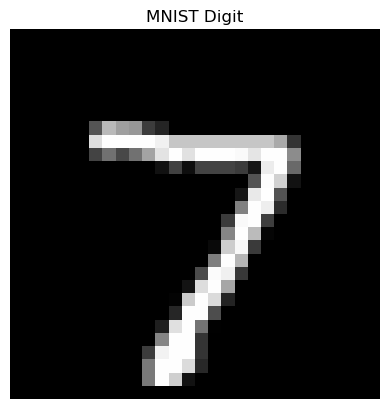

7


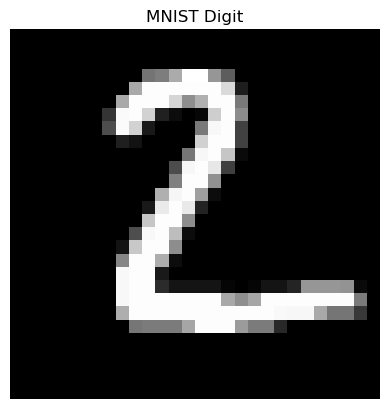

2


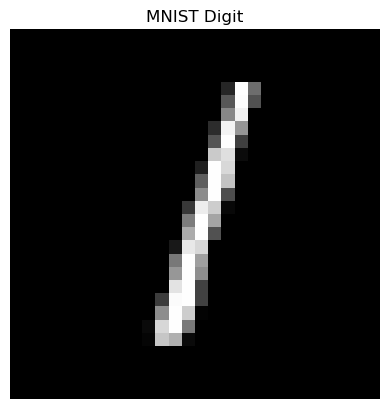

1


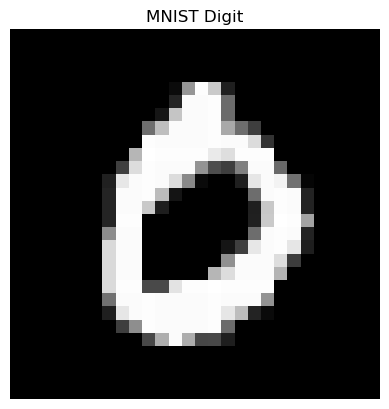

0


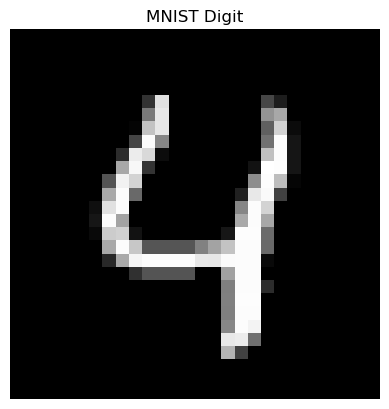

4


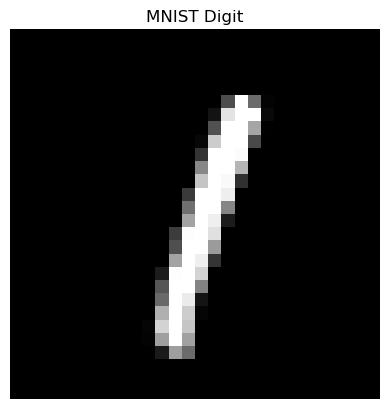

1


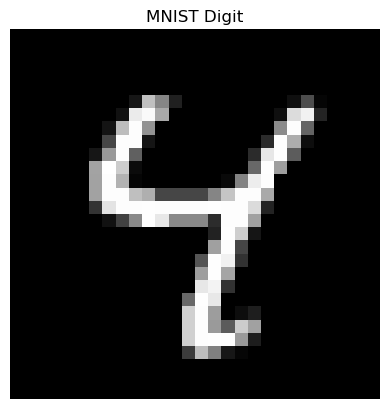

4


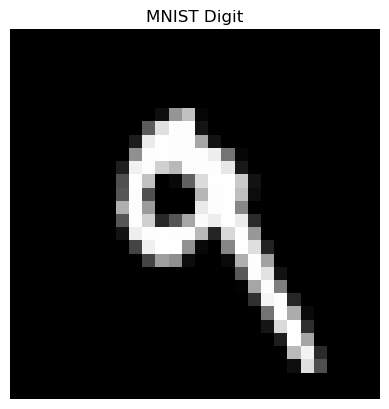

9


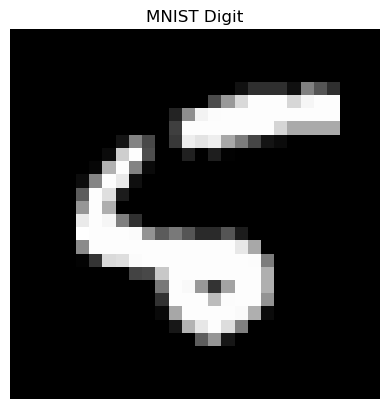

5


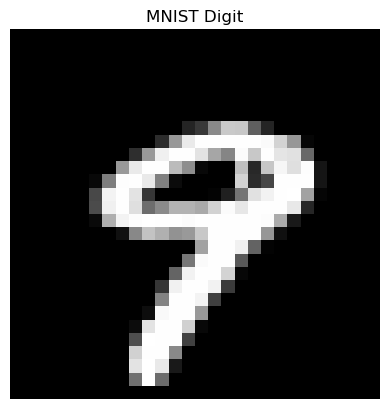

9


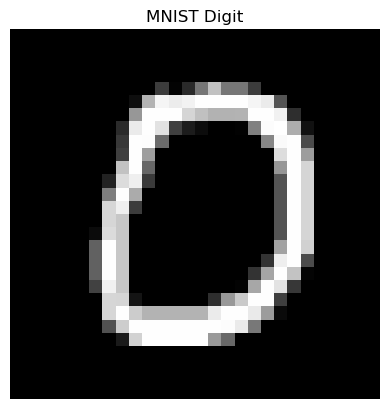

0


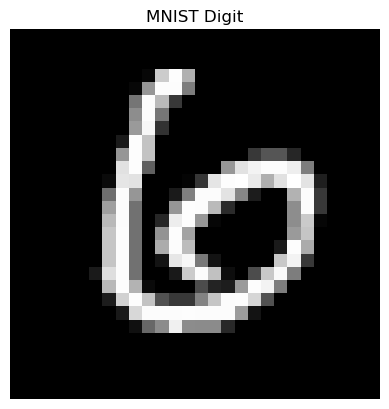

6


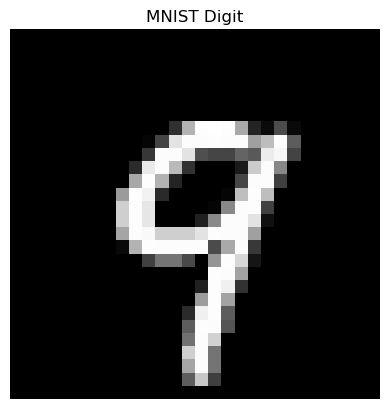

9


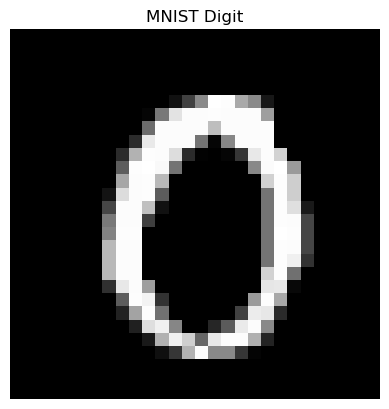

0


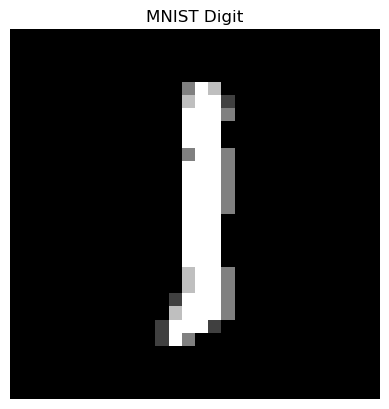

1


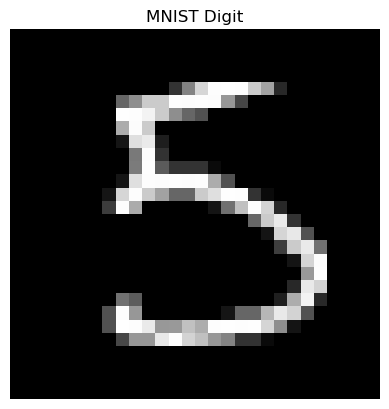

5


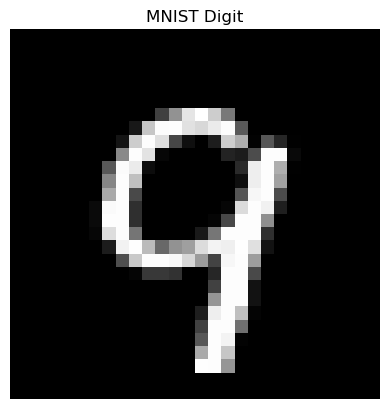

9


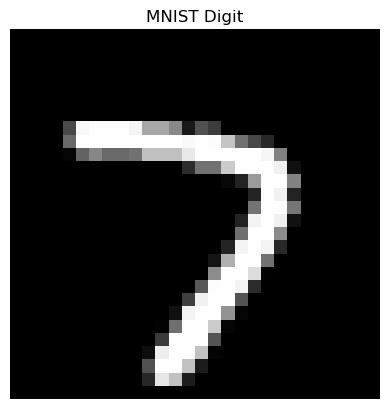

7


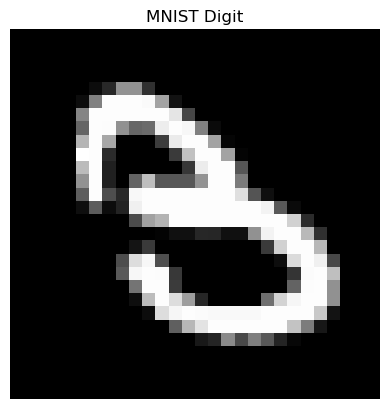

5


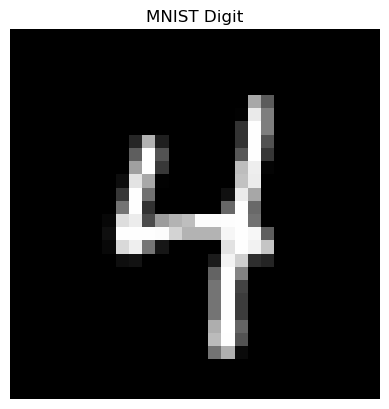

4


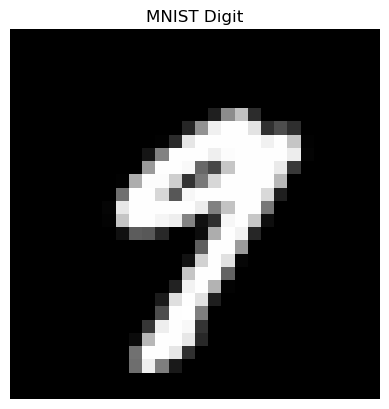

9


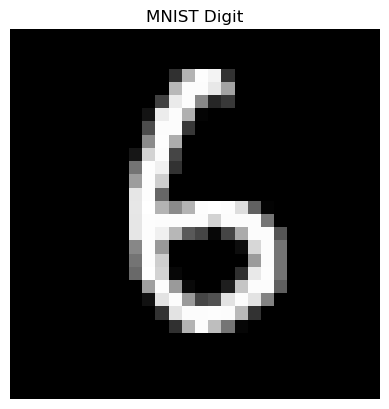

6


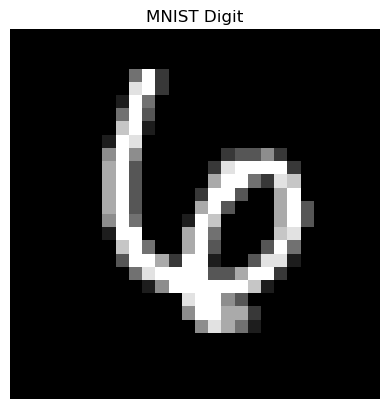

6


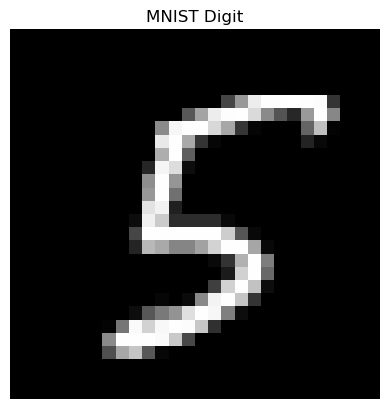

5


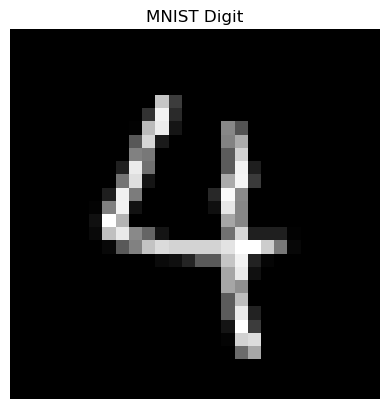

4


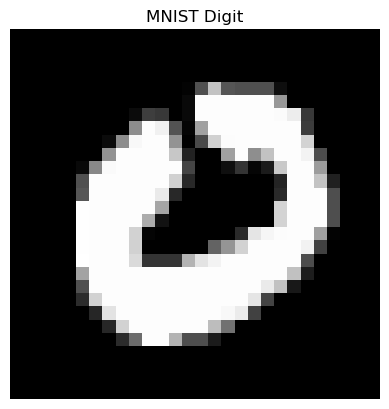

0


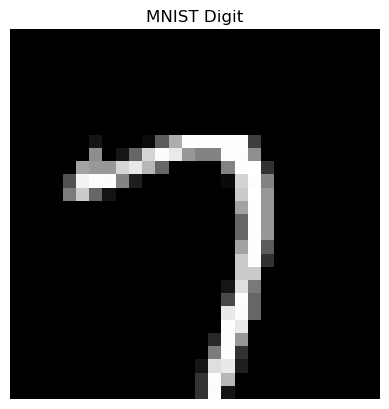

7


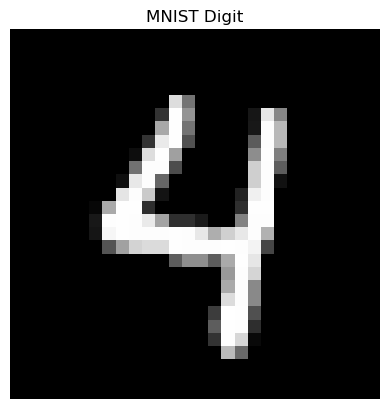

4


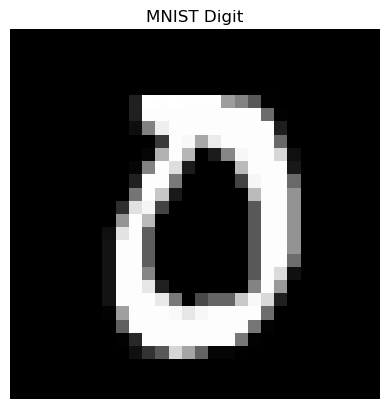

0


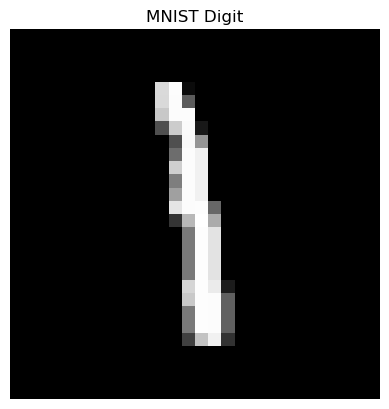

1


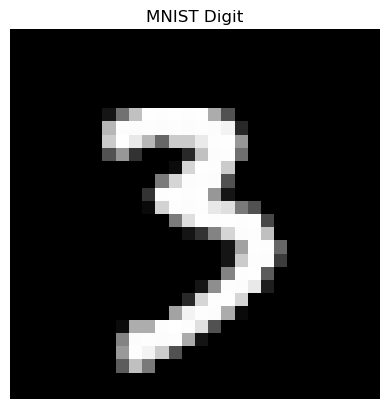

3


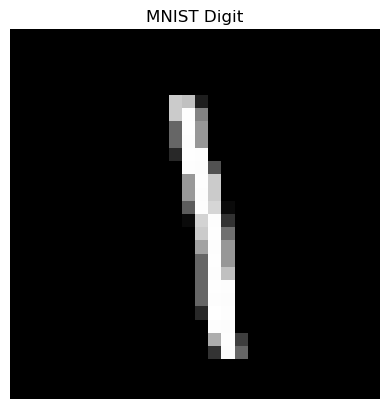

1


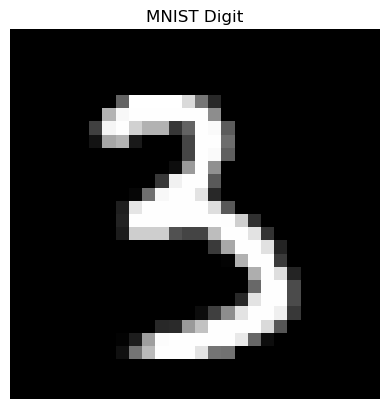

3


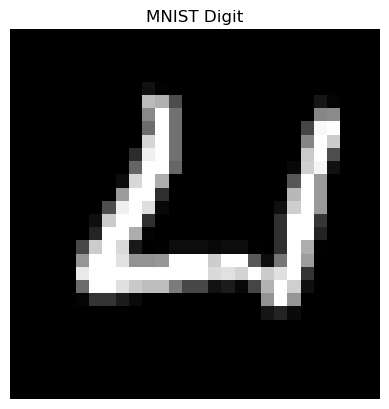

4


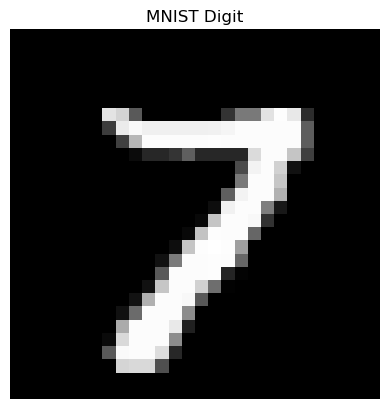

7


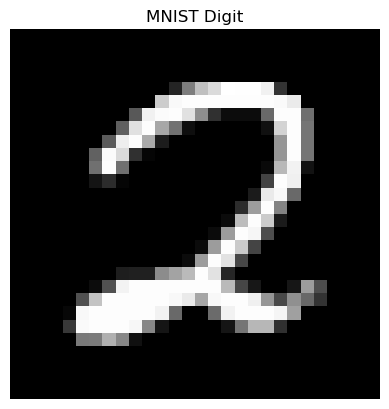

2


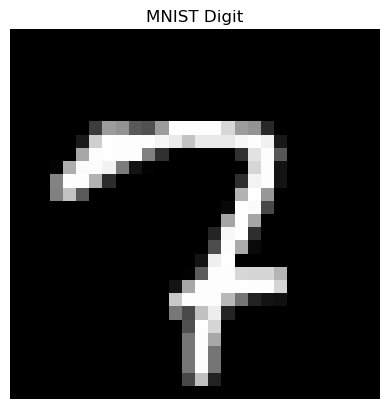

7


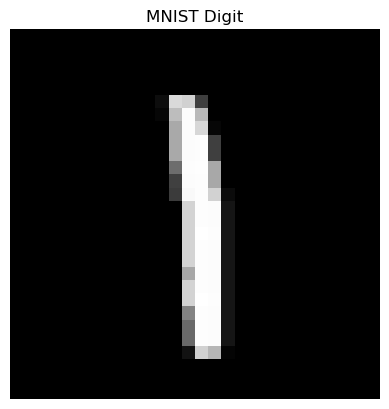

1


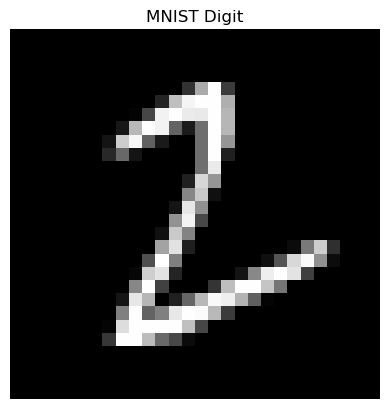

2


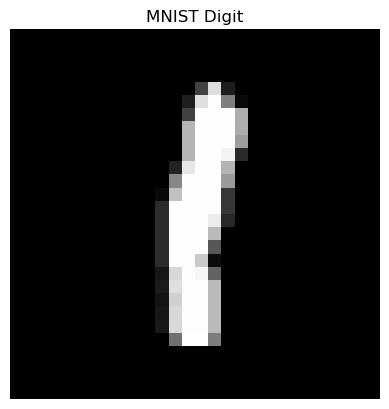

1


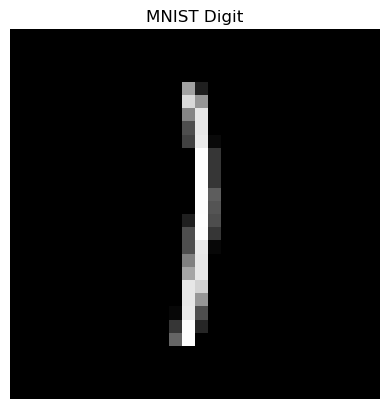

1


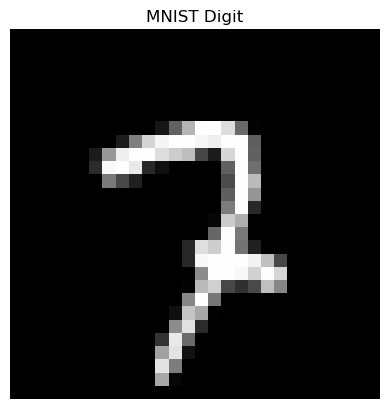

7


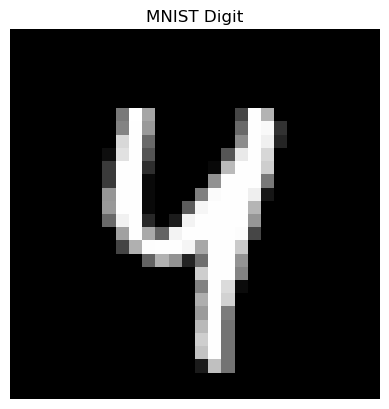

4


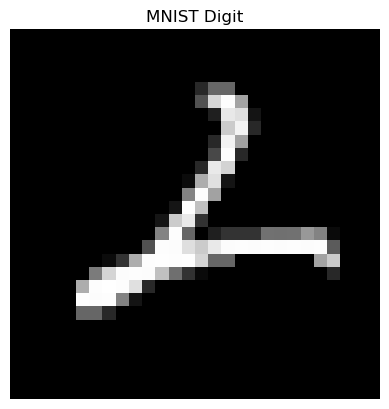

2


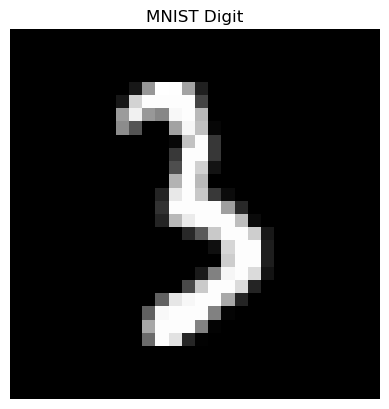

3


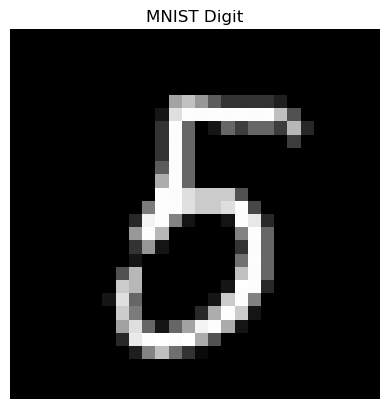

5


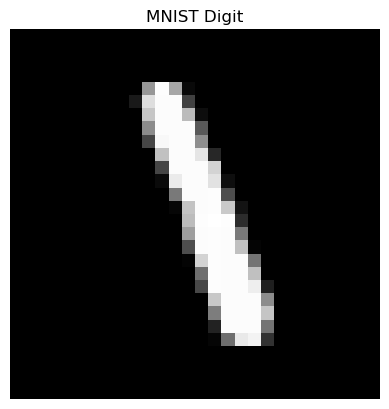

1


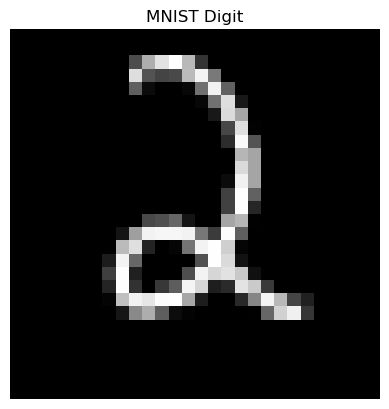

2


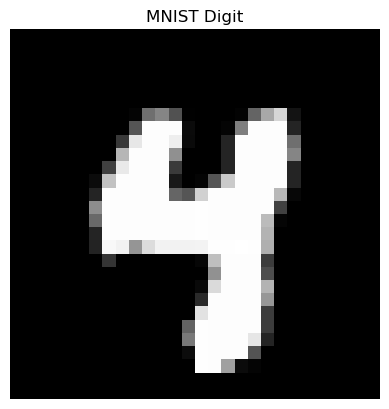

4


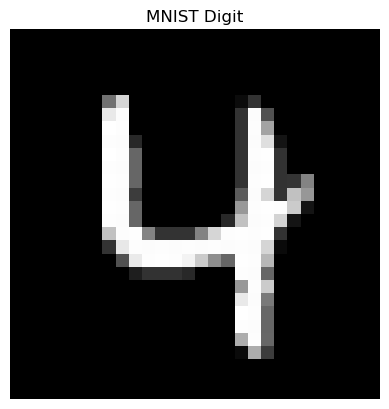

4


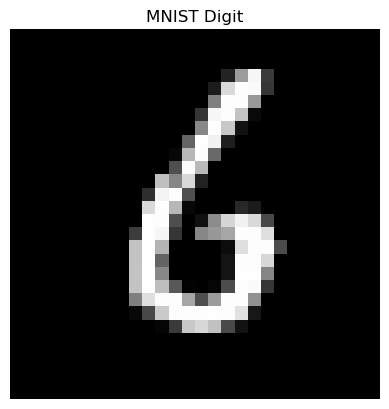

6


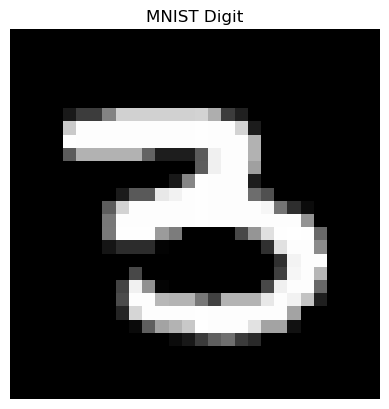

3


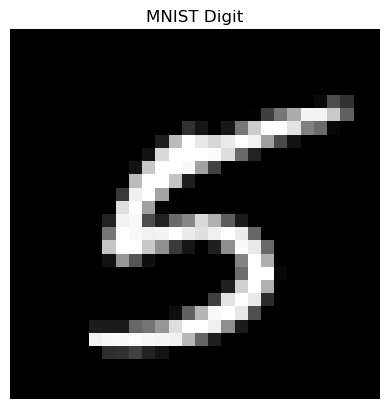

5


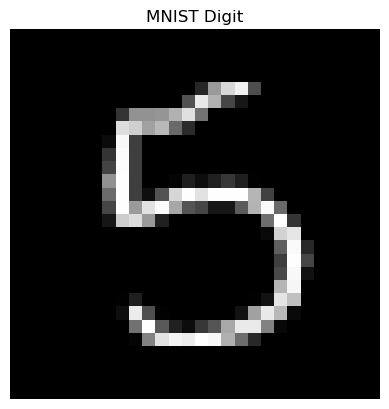

5


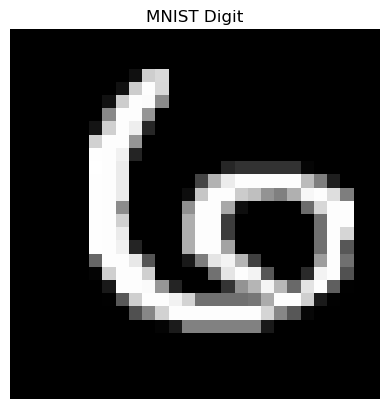

6


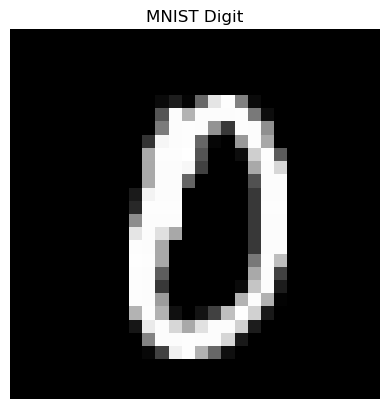

0


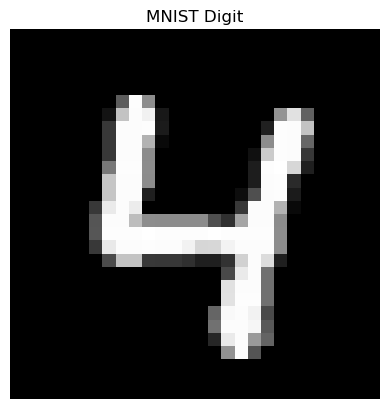

4


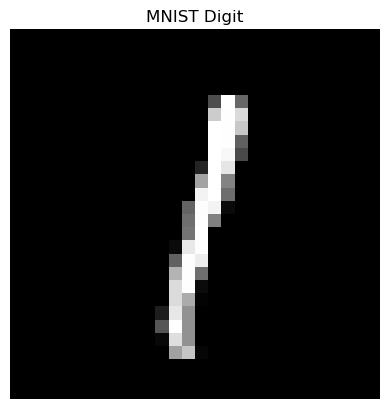

1


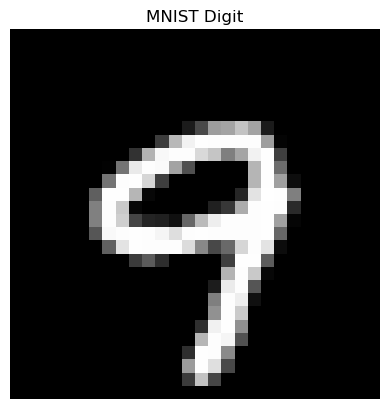

9


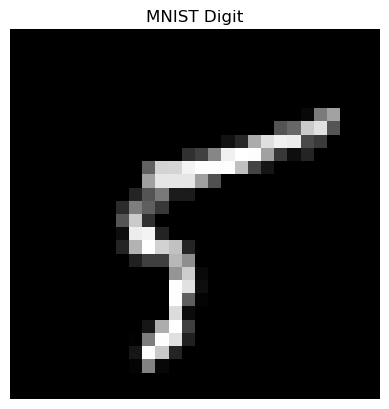

5


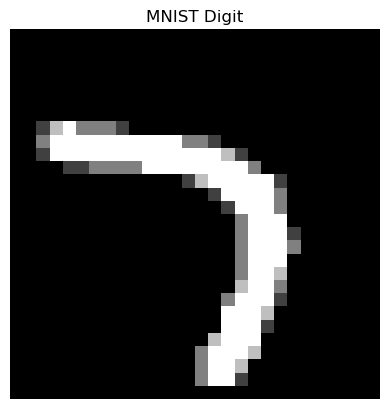

7


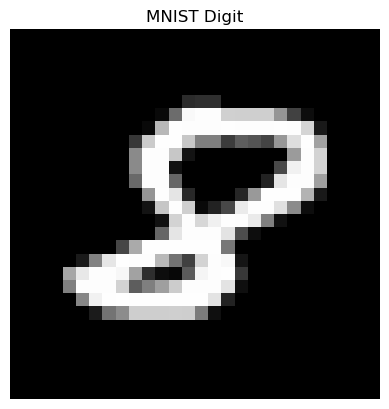

8


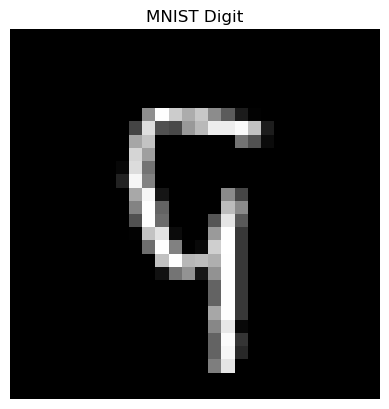

9


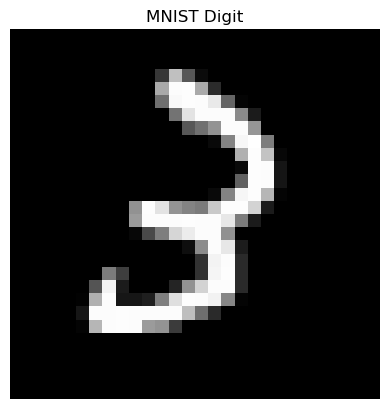

3


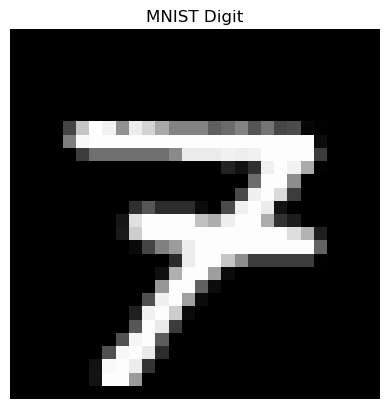

7


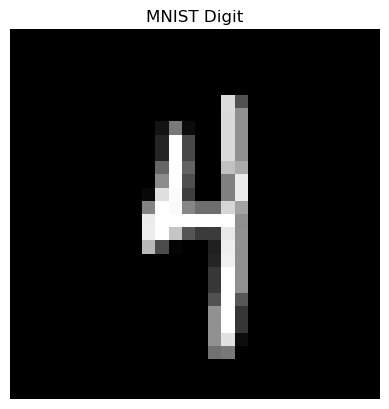

4


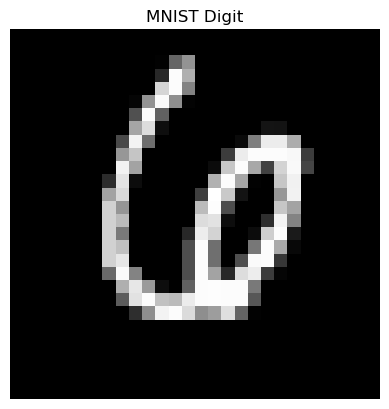

6


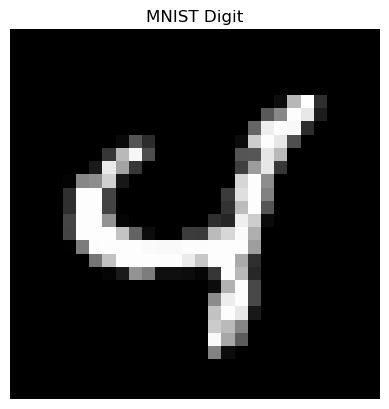

4


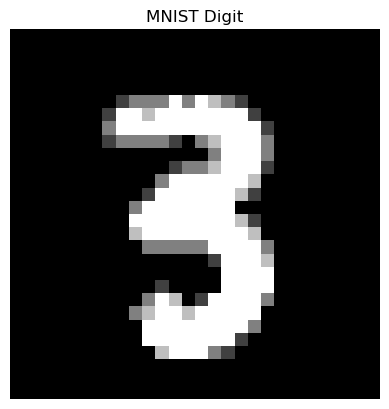

3


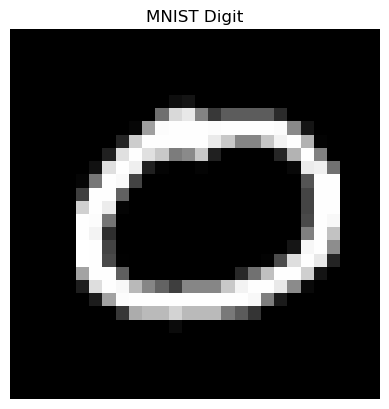

0


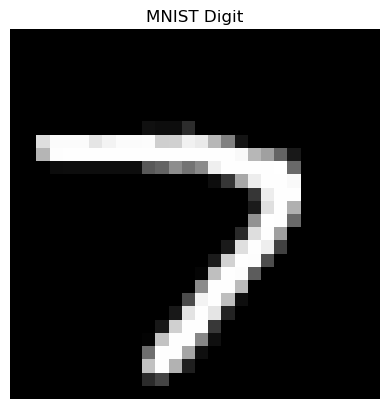

7


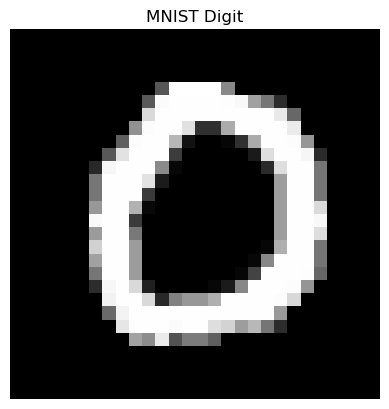

0


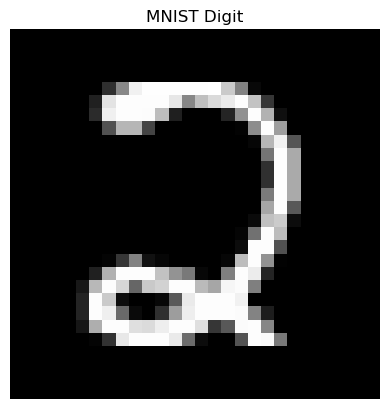

2


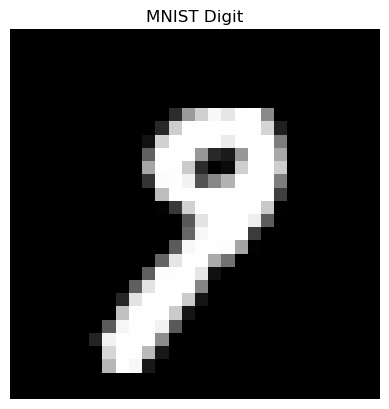

9


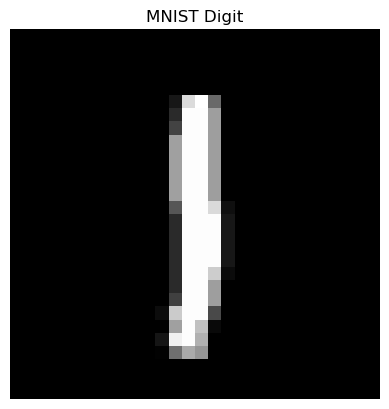

1


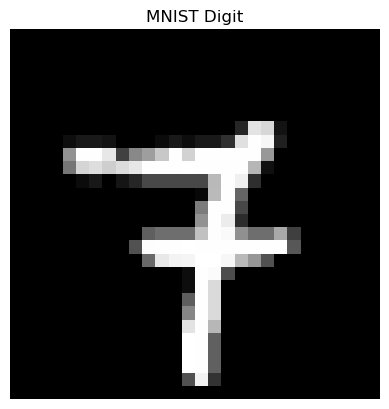

7


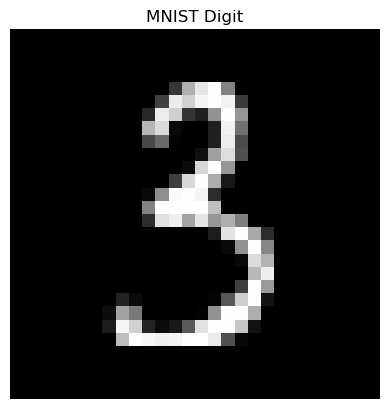

3


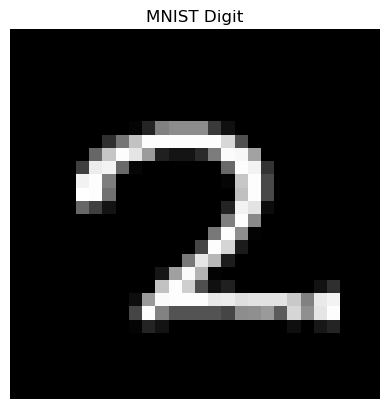

2


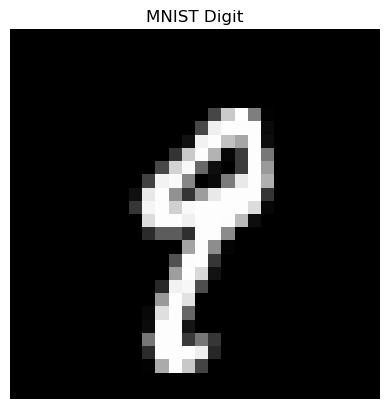

9


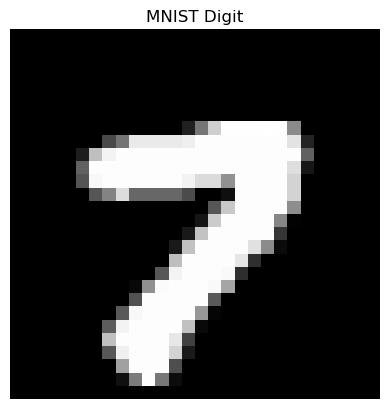

7


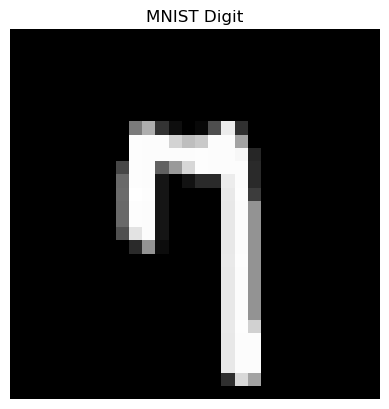

7


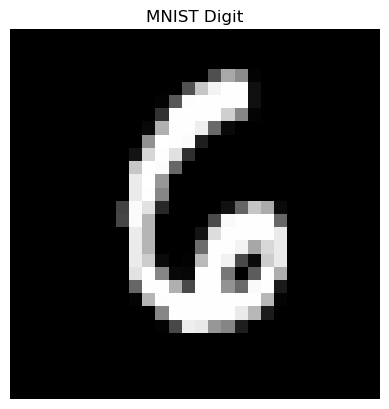

6


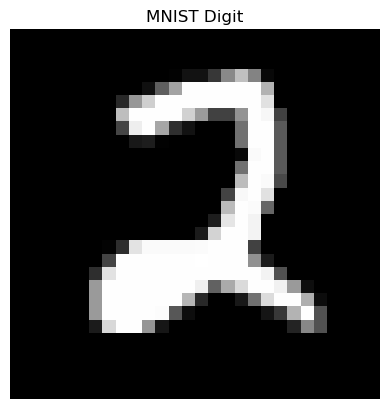

2


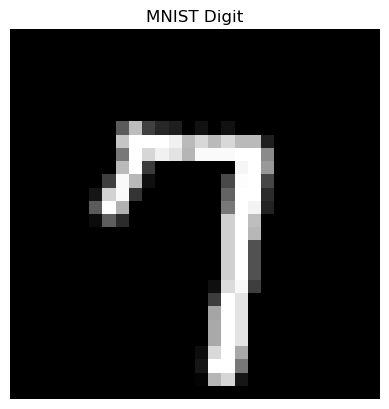

7


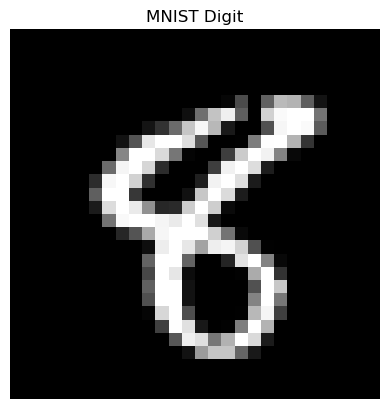

8


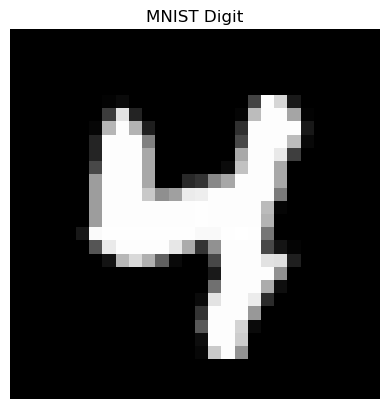

4


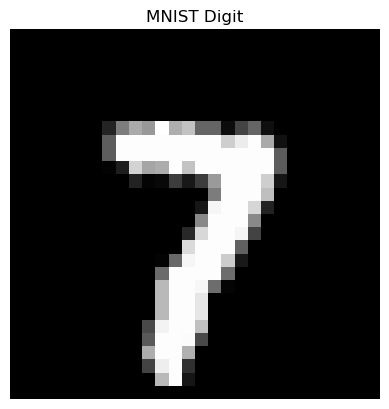

7


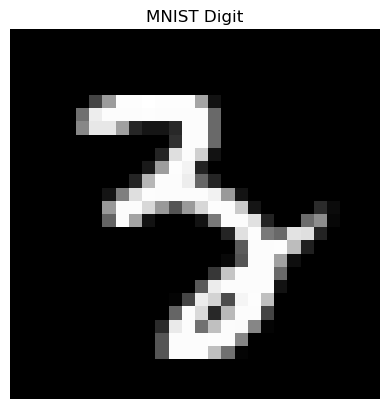

3


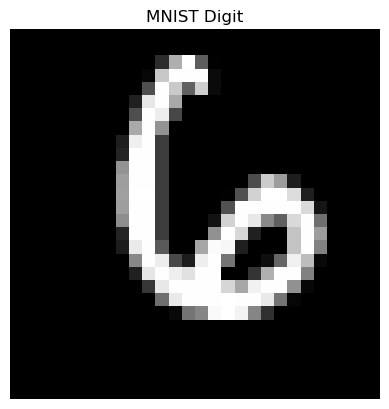

6


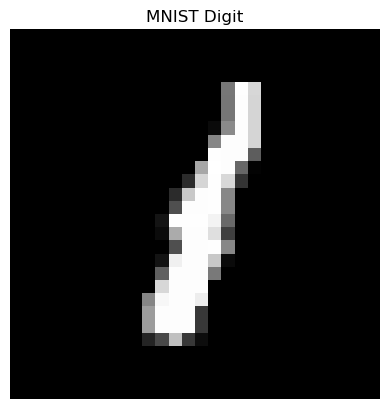

1


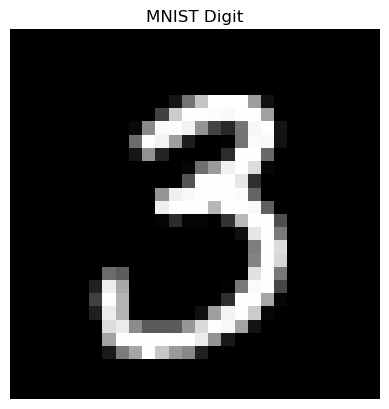

3


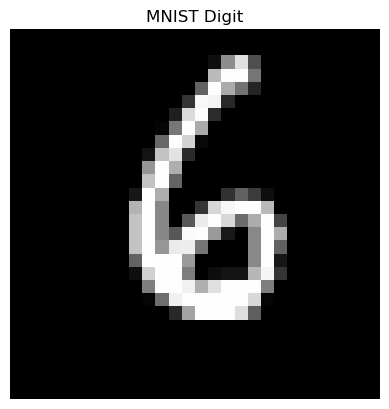

6


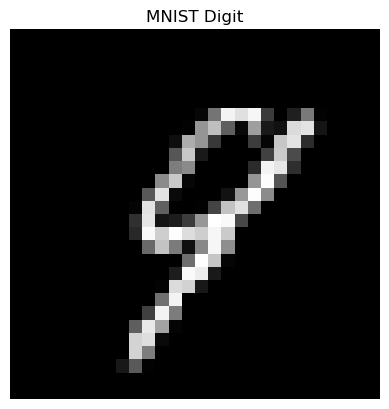

9


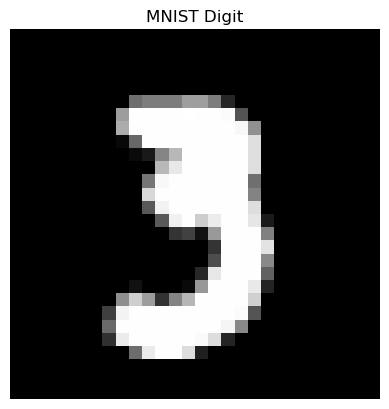

3


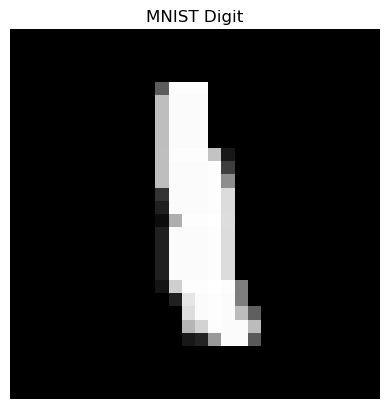

1


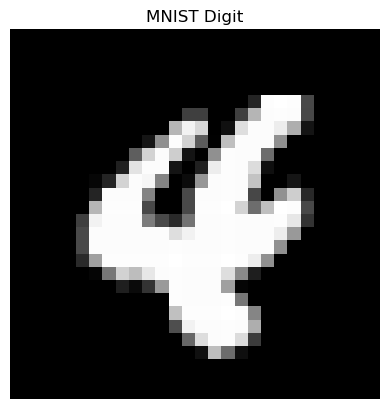

4


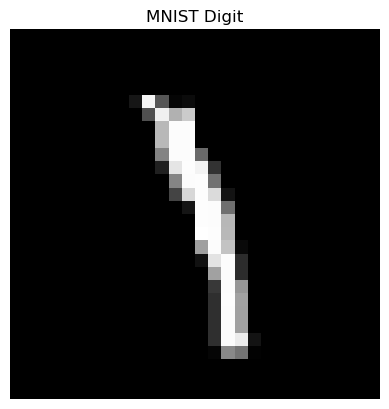

1


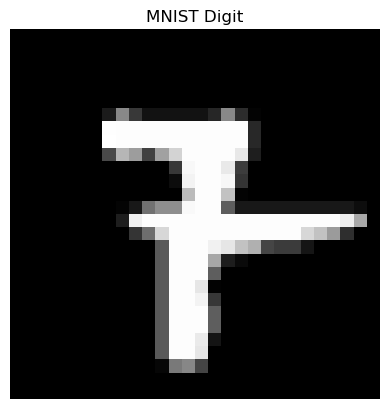

7


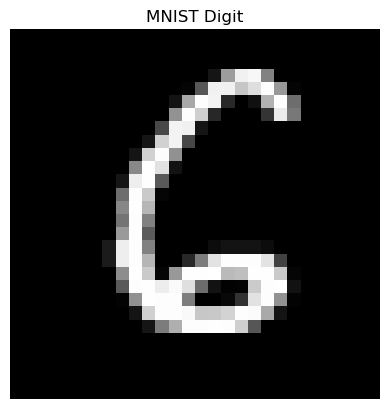

6


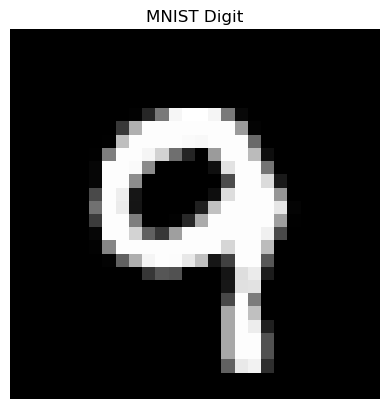

9


In [40]:
for i in range(100):
    model.eval()
    #print(i)
    output = model(X_test_tensor[i])
    output_softmax =  nn.functional.softmax(output, dim=0)
    prediction = torch.argmax(output_softmax).item()
    plt.imshow(X_test.iloc[i].to_numpy().reshape(28,28), cmap='gray')
    plt.title("MNIST Digit")
    plt.axis('off')  # Hide axes for clarity
    plt.show()
    print(prediction)